# Zápočtová úloha

Michaela Mašková

# 00 - Načtení a popis dat


    age: 
    sex:
        0: Female
        1: Male
    chest_pain_type: Chest Pain Type
        0: asymptomatic
        1: atypical angina
        2: non-anginal pain
        3: typical angina
    blood_pressure: Resting Blood Pressure: Person's resting blood pressure
    cholesterol: Serum Cholesterol in mg/dl
    blood_sugar: Fasting Blood Sugar
        0:Less Than 120mg/ml
        1: Greater Than 120mg/ml
    rest_ecg: Resting Electrocardiographic Measurement
        0: showing probable or definite left ventricular hypertrophy by Estes' criteria
        1: normal
        2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    heart_rate: Max Heart Rate Achieved: Maximum Heart Rate Achieved
    ex_angina: Exercise Induced Angina
        1: Yes
        0: No
    st_depression: ST depression induced by exercise relative to rest
    st_slope: Slope of the peak exercise ST segment
        0: downsloping
        1: flat
        2: upsloping
    thal:  blood disorder called 'Thalassemia':
        1: fixed defect
        2: normal
        3: reversable Defect
    num_vessels: Number of Major Vessels: Number of major vessels colored by fluoroscopy


In [4]:
#install.packages("tidymodels", dependencies = TRUE)
#install.packages("vip")
#install.packages("broom")
#install.packages("skimr")
#install.packages("glmnet")

library(tidymodels)
#library(vip)
library(broom)
library(skimr)
library(glmnet)

library(tidyverse)
library(knitr)
library(ggplot2)
library("GGally")

list_of_packages <- c("tidyverse", "car","nortest","lattice","pwr",
                      "MASS","agricolae","nlme","lme4","agricolae",
                      "scatterplot3d","FrF2","rsm","DoE.base","geoR",
                      "qualityTools","alr4","pid","ggplot2", "ggpubr", "stats");
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])];
if(length(missing_packages)) install.packages(missing_packages);
lapply(list_of_packages, library, character.only = TRUE);
library(FrF2);          #for 2^k  factorial design
library(DoE.base);      # Full factorials, orthogonal arrays
library(pid);
library(ggpubr);

[[1]]
 [1] "ggpubr"        "pid"           "alr4"          "effects"      
 [5] "qualityTools"  "Rsolnp"        "geoR"          "rsm"          
 [9] "FrF2"          "DoE.base"      "conf.design"   "grid"         
[13] "scatterplot3d" "lme4"          "nlme"          "agricolae"    
[17] "MASS"          "pwr"           "lattice"       "nortest"      
[21] "car"           "carData"       "GGally"        "knitr"        
[25] "forcats"       "stringr"       "readr"         "tidyverse"    
[29] "glmnet"        "Matrix"        "skimr"         "yardstick"    
[33] "workflowsets"  "workflows"     "tune"          "tidyr"        
[37] "tibble"        "rsample"       "recipes"       "purrr"        
[41] "parsnip"       "modeldata"     "infer"         "ggplot2"      
[45] "dplyr"         "dials"         "scales"        "broom"        
[49] "tidymodels"    "stats"         "graphics"      "grDevices"    
[53] "utils"         "datasets"      "methods"       "base"         

[[2]]
 [1] "ggpubr"        "pid"           "alr4"          "effects"      
 [5] "qualityTools"  "Rsolnp"        "geoR"          "rsm"          
 [9] "FrF2"          "DoE.base"      "conf.design"   "grid"         
[13] "scatterplot3d" "lme4"          "nlme"          "agricolae"    
[17] "MASS"          "pwr"           "lattice"       "nortest"      
[21] "car"           "carData"       "GGally"        "knitr"        
[25] "forcats"       "stringr"       "readr"         "tidyverse"    
[29] "glmnet"        "Matrix"        "skimr"         "yardstick"    
[33] "workflowsets"  "workflows"     "tune"          "tidyr"        
[37] "tibble"        "rsample"       "recipes"       "purrr"        
[41] "parsnip"       "modeldata"     "infer"         "ggplot2"      
[45] "dplyr"         "dials"         "scales"        "broom"        
[49] "tidymodels"    "stats"         "graphics"      "grDevices"    
[53] "utils"         "datasets"      "methods"       "base"         

[[3]]
 [1] "ggpubr"        "pid"           "alr4"          "effects"      
 [5] "qualityTools"  "Rsolnp"        "geoR"          "rsm"          
 [9] "FrF2"          "DoE.base"      "conf.design"   "grid"         
[13] "scatterplot3d" "lme4"          "nlme"          "agricolae"    
[17] "MASS"          "pwr"           "lattice"       "nortest"      
[21] "car"           "carData"       "GGally"        "knitr"        
[25] "forcats"       "stringr"       "readr"         "tidyverse"    
[29] "glmnet"        "Matrix"        "skimr"         "yardstick"    
[33] "workflowsets"  "workflows"     "tune"          "tidyr"        
[37] "tibble"        "rsample"       "recipes"       "purrr"        
[41] "parsnip"       "modeldata"     "infer"         "ggplot2"      
[45] "dplyr"         "dials"         "scales"        "broom"        
[49] "tidymodels"    "stats"         "graphics"      "grDevices"    
[53] "utils"         "datasets"      "methods"       "base"         

[[4]]
 [1] "ggpubr"        "pid"           "alr4"          "effects"      
 [5] "qualityTools"  "Rsolnp"        "geoR"          "rsm"          
 [9] "FrF2"          "DoE.base"      "conf.design"   "grid"         
[13] "scatterplot3d" "lme4"          "nlme"          "agricolae"    
[17] "MASS"          "pwr"           "lattice"       "nortest"      
[21] "car"           "carData"       "GGally"        "knitr"        
[25] "forcats"       "stringr"       "readr"         "tidyverse"    
[29] "glmnet"        "Matrix"        "skimr"         "yardstick"    
[33] "workflowsets"  "workflows"     "tune"          "tidyr"        
[37] "tibble"        "rsample"       "recipes"       "purrr"        
[41] "parsnip"       "modeldata"     "infer"         "ggplot2"      
[45] "dplyr"         "dials"         "scales"        "broom"        
[49] "tidymodels"    "stats"         "graphics"      "grDevices"    
[53] "utils"         "datasets"      "methods"       "base"         

[[5]]
 [1] "ggpubr"        "pid"           "alr4"          "effects"      
 [5] "qualityTools"  "Rsolnp"    

In [742]:
data_train <- "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/heart_train.csv"
data_train  <- read.table(data_train, header = T, sep = ",")
head(data_train)

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,ex_angina,st_depression,st_slope,num_vessels,thal,disease
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,male,3,145,233,1,0,150,0,2.3,0,0,1,0
2,37,male,2,130,250,0,1,187,0,3.5,0,0,2,0
3,41,female,1,130,204,0,0,172,0,1.4,2,0,2,0
4,56,male,1,120,236,0,1,178,0,0.8,2,0,2,0
5,57,female,0,120,354,0,1,163,1,0.6,2,0,2,0
6,57,male,0,140,192,0,1,148,0,0.4,1,0,1,0


In [743]:
data_test <- "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/heart_test.csv"
data_test  <- read.table(data_test, header = T, sep = ",")
head(data_test)

,age,sex,chest_pain_type,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,ex_angina,st_depression,st_slope,num_vessels,thal,disease
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,66,1,0,160,228,0,0,138,0,2.3,2,0,1,0
2,71,0,0,112,149,0,1,125,0,1.6,1,0,2,0
3,64,1,3,170,227,0,0,155,0,0.6,1,0,3,0
4,66,0,2,146,278,0,0,152,0,0.0,1,1,2,0
5,39,0,2,138,220,0,1,152,0,0.0,1,0,2,0
6,58,0,0,130,197,0,1,131,0,0.6,1,0,2,0


In [744]:
data_table <- data_train %>%
   dplyr::select(age, sex, blood_pressure,disease) %>%
   mutate(age             = cut(age, breaks=c(-Inf, 44,60, Inf),labels=c("30-45","45-60","60-75")),
          blood_pressure  = cut(blood_pressure, breaks=c(-Inf, 120,130,140,Inf),labels=c("100-120","121-130","131-140","140-180"))) %>%
  group_by(age,blood_pressure) %>%
  summarise(n = n(),
         disease_yes = sum(disease),
         disease_no = n - sum(disease)
        )        
   data_table

`summarise()` has grouped output by 'age'. You can override using the `.groups` argument.



age,blood_pressure,n,disease_yes,disease_no
<fct>,<fct>,<int>,<int>,<int>
30-45,100-120,26,7,19
30-45,121-130,11,1,10
30-45,131-140,9,3,6
30-45,140-180,3,1,2
45-60,100-120,44,15,29
45-60,121-130,42,22,20
45-60,131-140,35,14,21
45-60,140-180,33,21,12
60-75,100-120,18,9,9


# 01 - Deskriptivní analýza dat

Nejdříve se podíváme, s jakými daty pracujeme, jestli zde máme nějaké nedefinované (NA) hodnoty, jaké jsou průměry, mediány, rozptyly a podobně. Také zajistíme, že numerické proměnné jsou numerické, faktorové naopak faktorové.

Z popisu dat můžeme usoudit, že numerické proměnné budou:
- age
- blood_pressure
- cholesterol
- heart_rate
- st_depression
- num_vessels

Zbylé proměnné jsou kategorické, některé s dvěma úrovněmi, jiné s více úrovněmi.

Proměnná, která nás zajímá, je `disease`, což je proměnná, která určuje, jestli daný jedinec má nebo nemá vadu srdce.

In [745]:
train <- data_train

In [746]:
for (i in c(2,3,6,7,9,11,13,14)) {
    train[,i] <- as.factor(train[,i])
}

In [747]:
summary(train)

      age            sex      chest_pain_type blood_pressure   cholesterol   
 Min.   :31.00   female: 90   0:130           Min.   :100.0   Min.   :126.0  
 1st Qu.:48.00   male  :183   1: 42           1st Qu.:120.0   1st Qu.:212.0  
 Median :55.00                2: 79           Median :130.0   Median :243.0  
 Mean   :54.32                3: 22           Mean   :131.5   Mean   :248.1  
 3rd Qu.:61.00                                3rd Qu.:140.0   3rd Qu.:275.0  
 Max.   :75.00                                Max.   :180.0   Max.   :564.0  
 blood_sugar rest_ecg   heart_rate    ex_angina st_depression   st_slope
 0:231       0:131    Min.   : 71.0   0:183     Min.   :0.000   0: 17   
 1: 42       1:138    1st Qu.:134.0   1: 90     1st Qu.:0.000   1:125   
             2:  4    Median :152.0             Median :0.800   2:131   
                      Mean   :149.6             Mean   :1.028           
                      3rd Qu.:166.0             3rd Qu.:1.600           
                

## Spojité proměnné

Pro spojité proměnné se můžeme podívat na boxploty a histogramy v závislosti na přítomnosti srdeční vady. Nejdříve se podíváme na boxploty a porovnáme střední hodnoty spojitých veličin pro pacienty bez srdeční vady a se srdeční vadou.

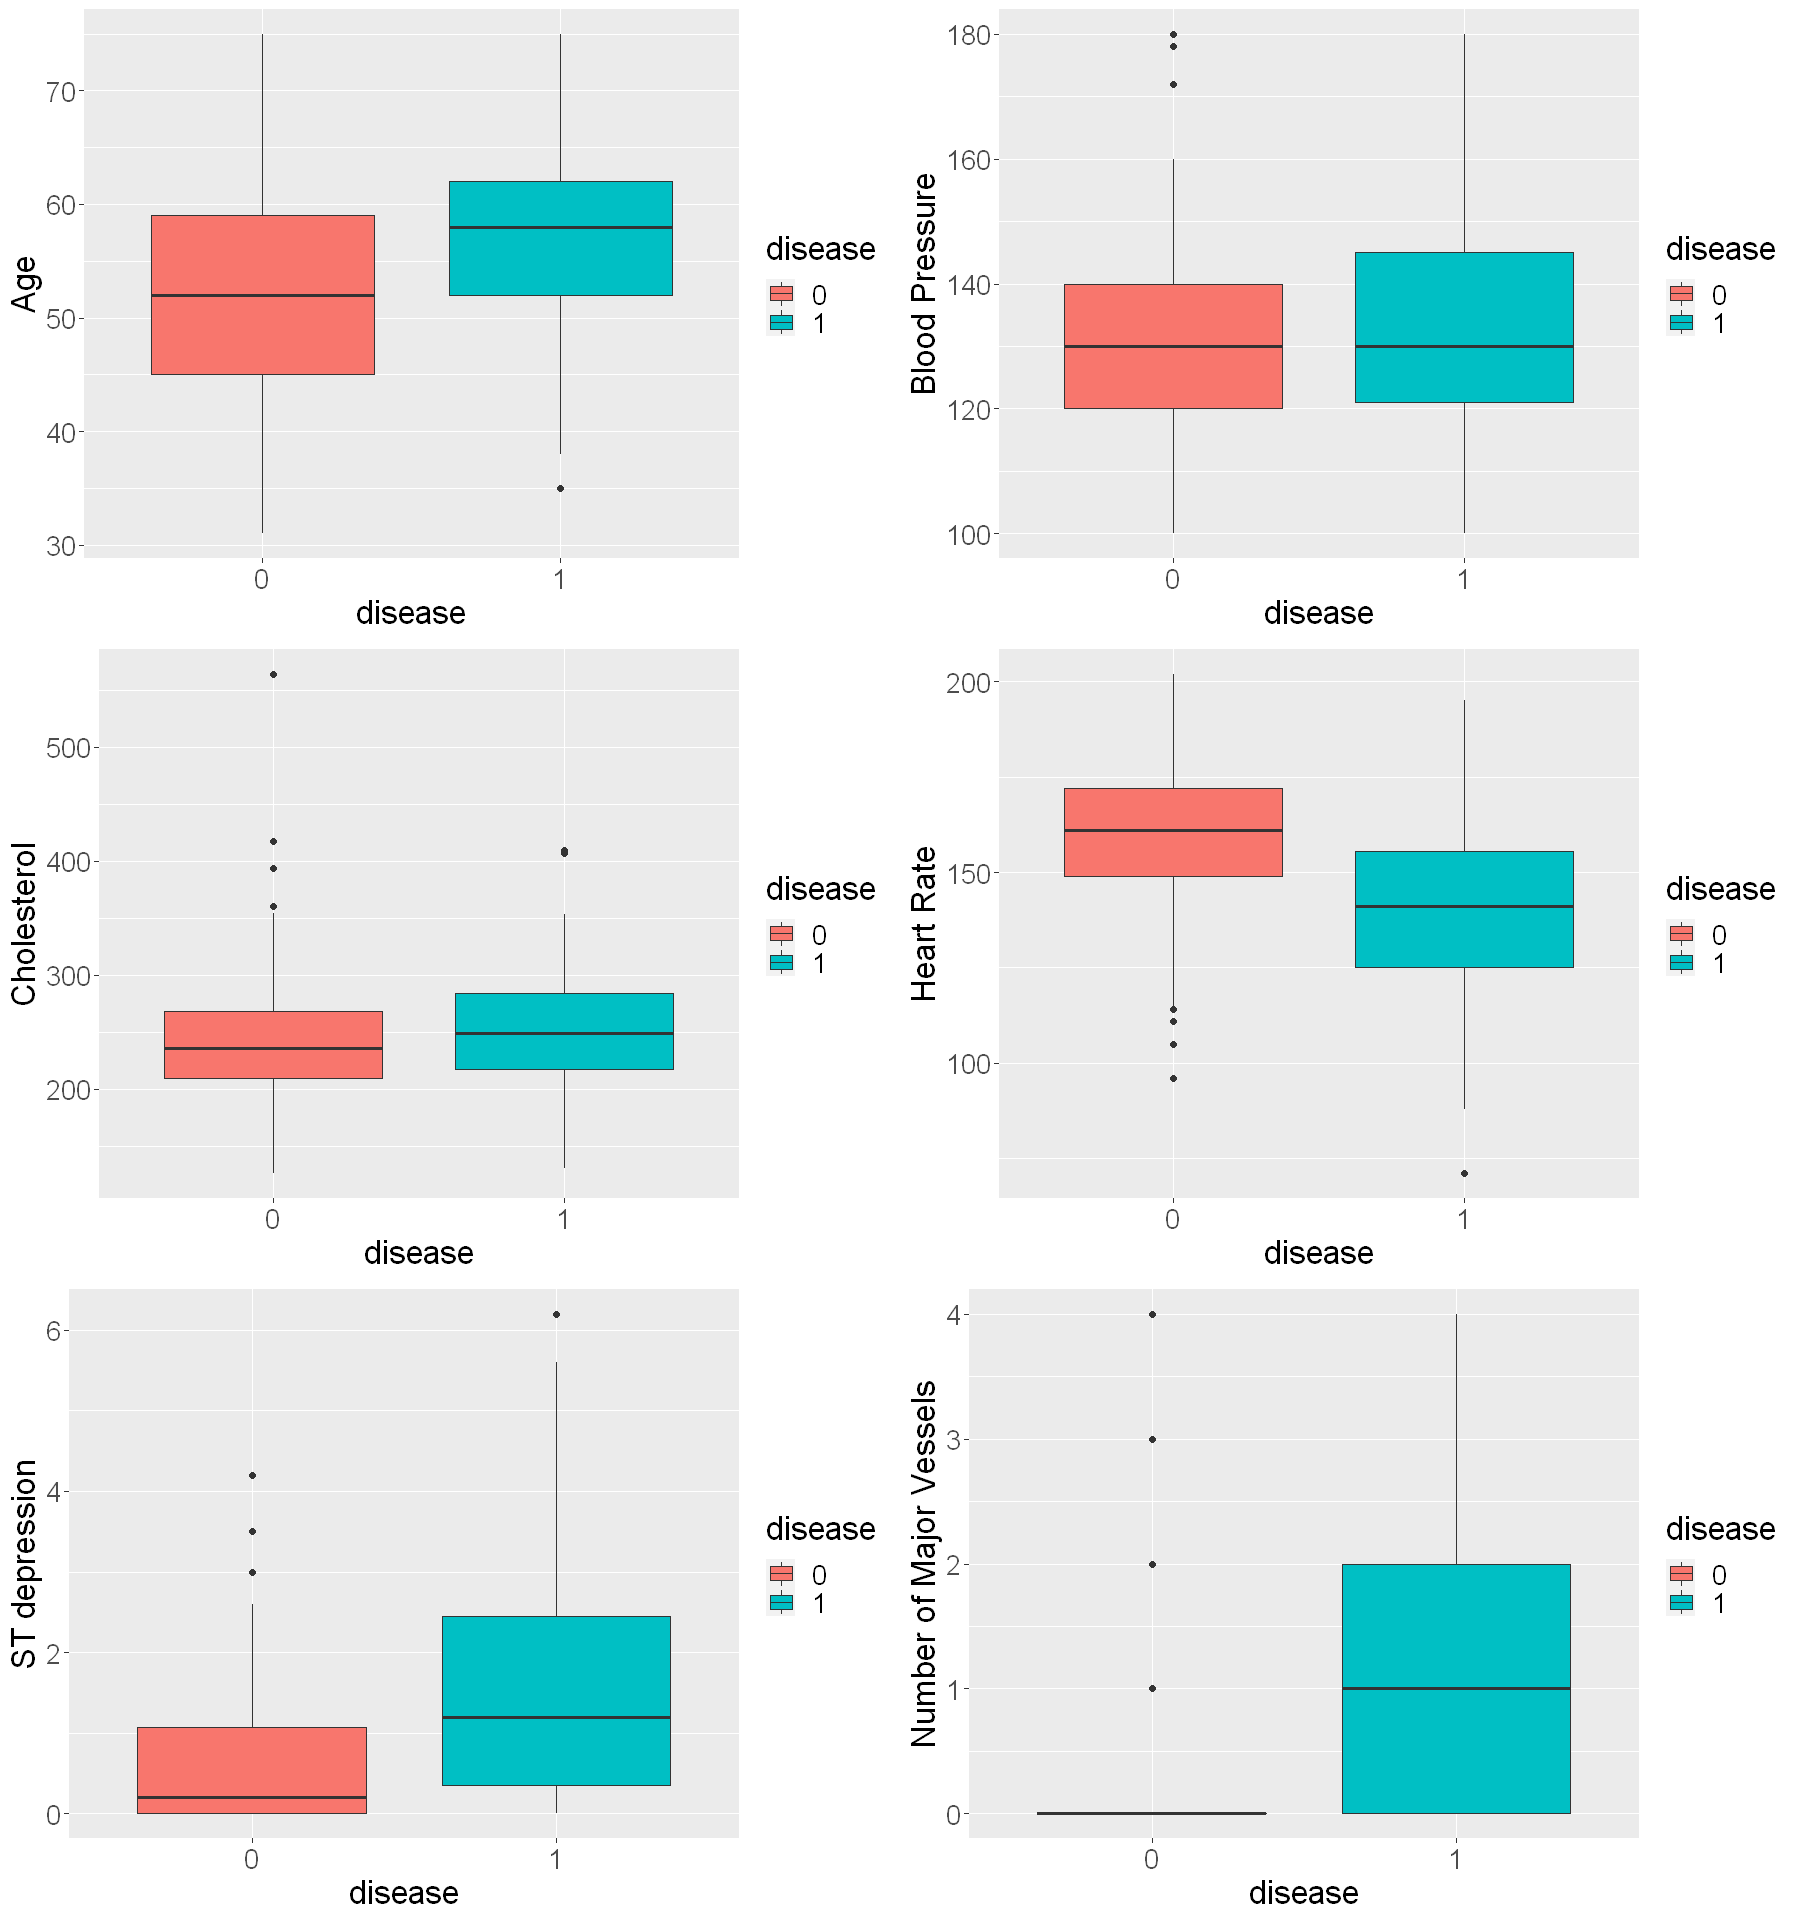

In [748]:
options(repr.plot.width=15, repr.plot.height=16)
p1 <- ggplot(data=train) +
    geom_boxplot(aes(y=age, x=disease, fill=disease)) +
    labs(y="Age") +
    theme(text = element_text(size = 20))

p2 <- ggplot(data=train, aes(y=blood_pressure, x=disease, fill=disease)) +
    geom_boxplot() +
    labs(y="Blood Pressure") +
    theme(text = element_text(size = 20))

p3 <- ggplot(data=train, aes(y=cholesterol, x=disease, fill=disease)) +
    geom_boxplot() +
    labs(y="Cholesterol") +
    theme(text = element_text(size = 20))

p4 <- ggplot(data=train, aes(y=heart_rate, x=disease, fill=disease)) +
    geom_boxplot() +
    labs(y="Heart Rate") +
    theme(text = element_text(size = 20))

p5 <- ggplot(data=train, aes(y=st_depression, x=disease, fill=disease)) +
    geom_boxplot() +
    labs(y="ST depression") +
    theme(text = element_text(size = 20))

p6 <- ggplot(data=train, aes(y=num_vessels, x=disease, fill=disease)) +
    geom_boxplot() +
    labs(y="Number of Major Vessels") +
    theme(text = element_text(size = 20))

ggarrange(p1,p2,p3,p4,p5,p6, ncol=2, nrow=3)

Z boxplotů můžeme vidět rozdílné střední hodnoty (mediány) hlavně pro proměnné age, heart rate a number of major vessels, také lehce pro ST depression. Naopak žádný viditelný rozdíl není pro proměnné cholesterol nebo blood pressure.

Niže se můžeme ještě podívat na histogramy a rozdělení spojitých veličin.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



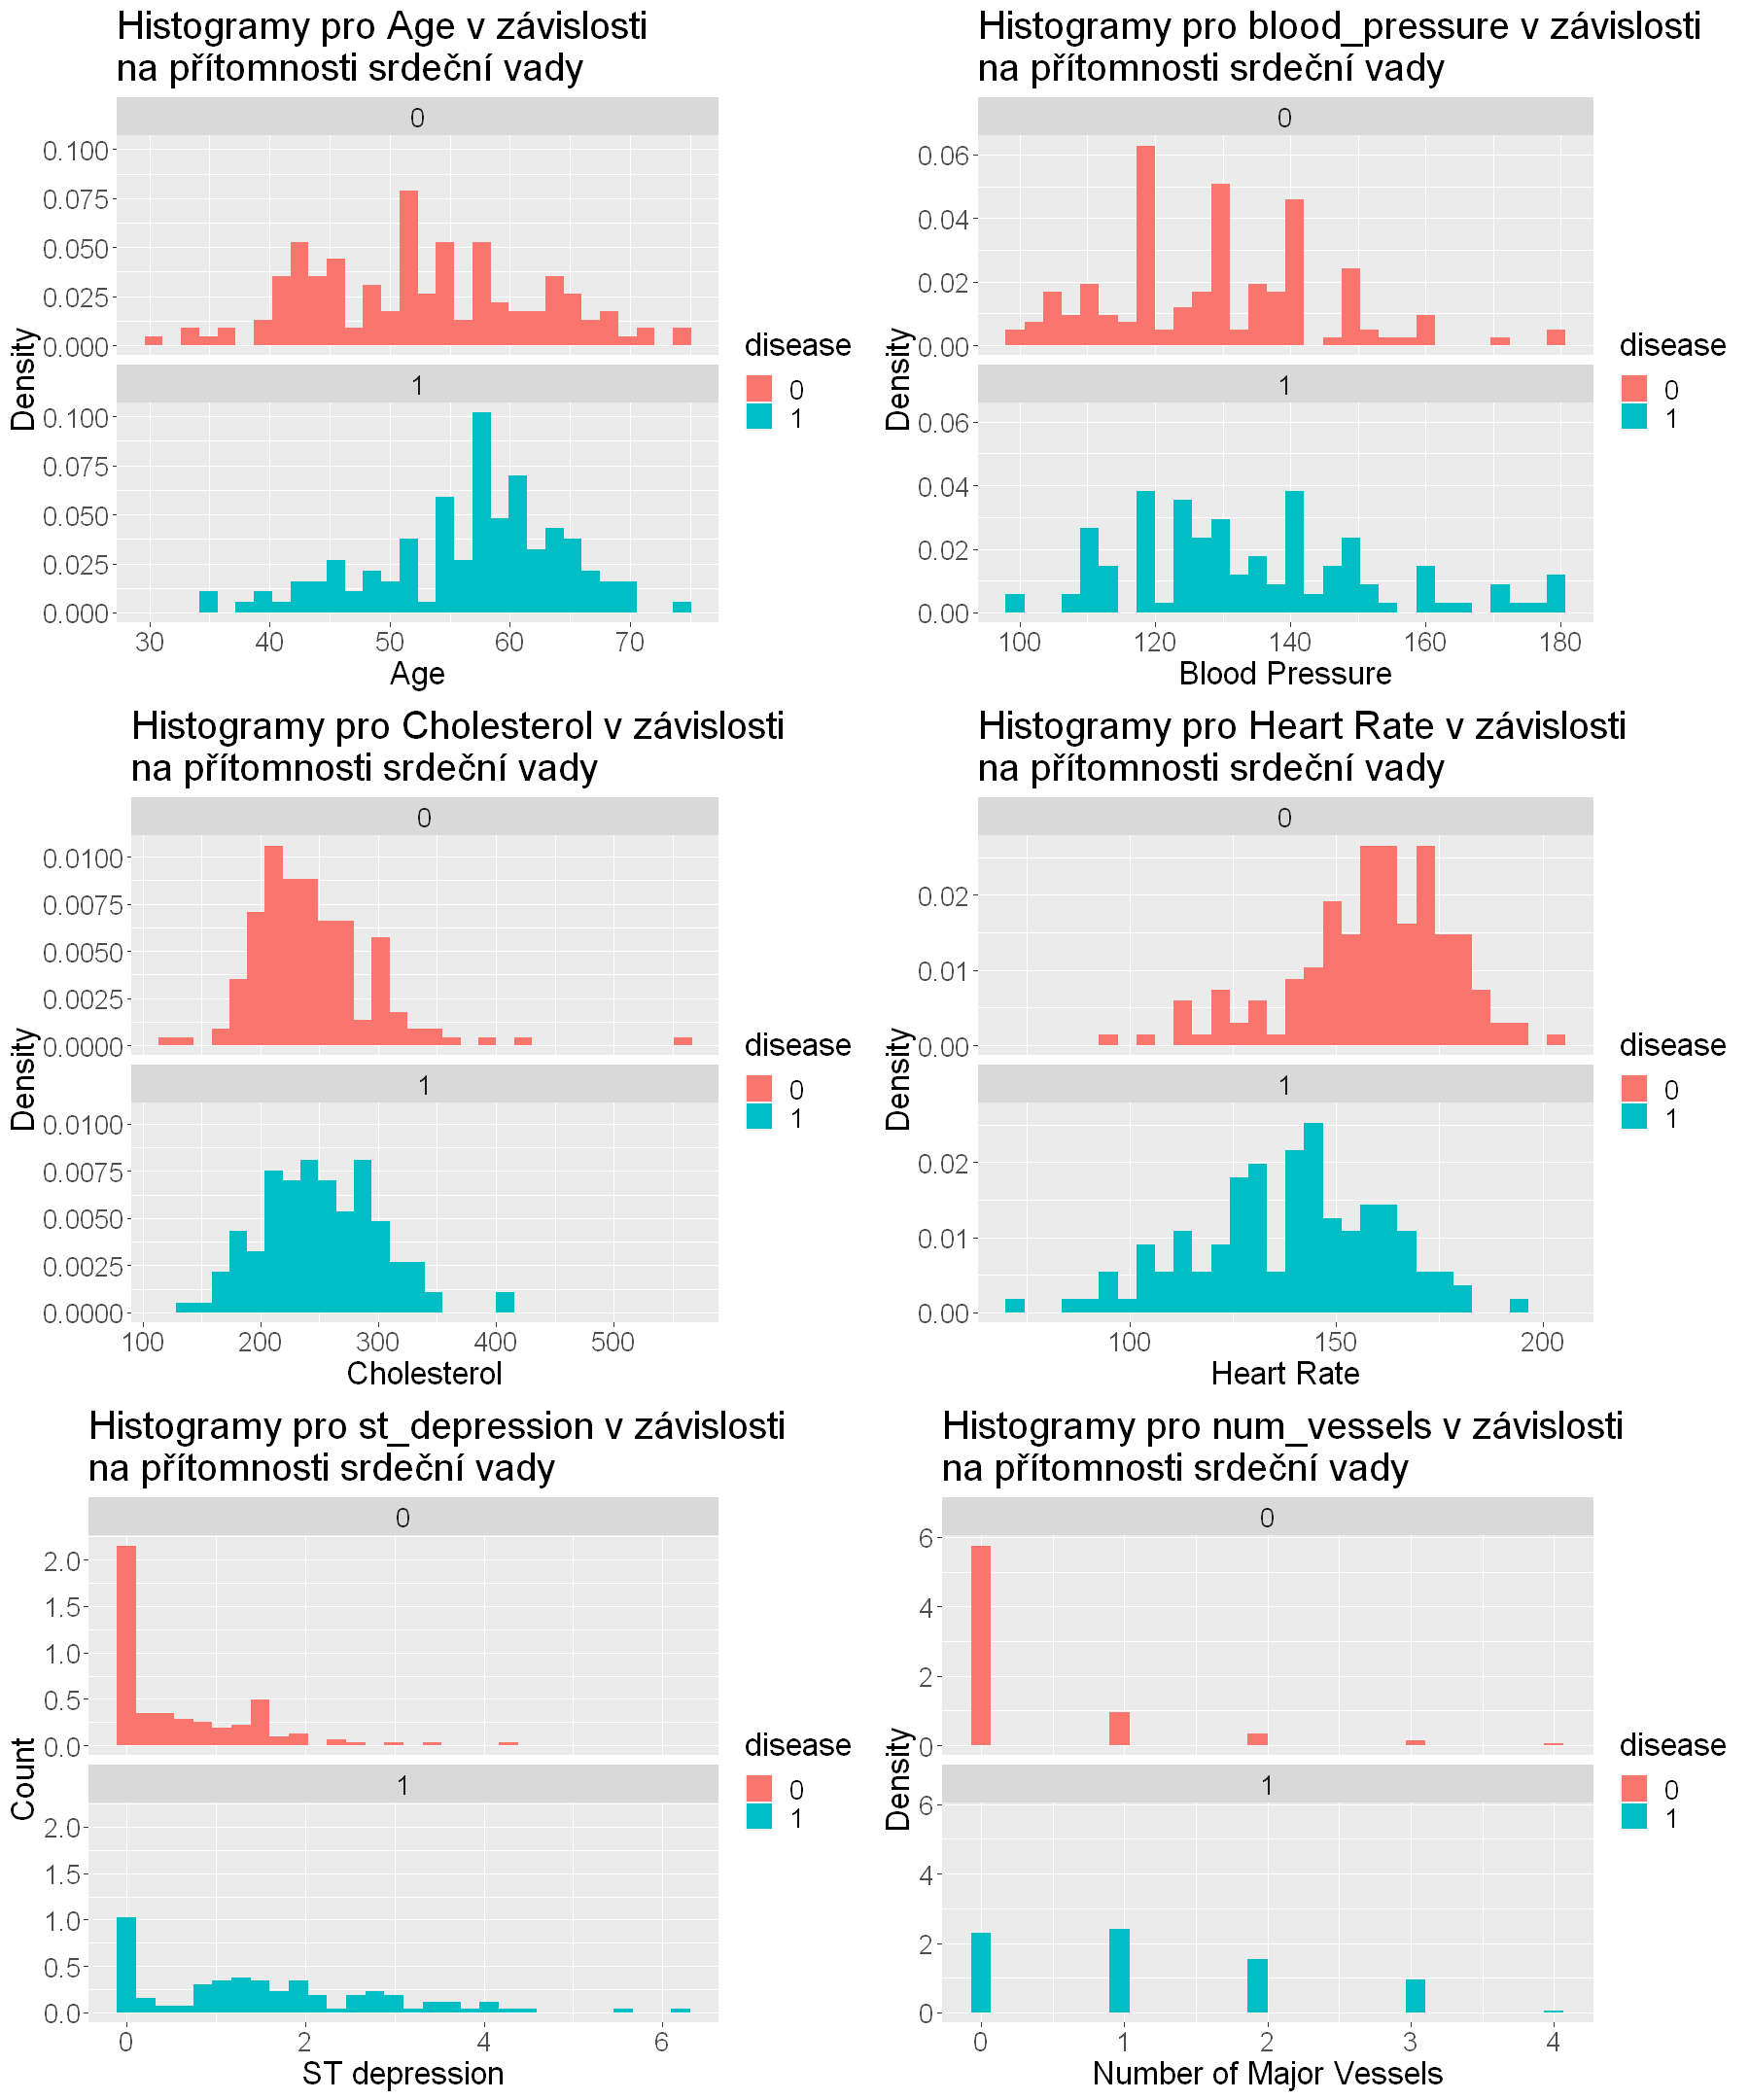

In [749]:
options(repr.plot.width=15, repr.plot.height=18)
p1 <- ggplot(data=train, aes(x=age, fill=disease, y=..density..)) +
    geom_histogram() +
    labs(title="Histogramy pro Age v závislosti\nna přítomnosti srdeční vady", x="Age", y="Density") +
    facet_wrap(~disease,nrow=2) +
    theme(text = element_text(size = 20))

p2 <- ggplot(data=train, aes(x=blood_pressure, fill=disease, y=..density..)) +
    geom_histogram() +
    labs(title="Histogramy pro blood_pressure v závislosti\nna přítomnosti srdeční vady", x="Blood Pressure", y="Density") +
    facet_wrap(~disease,nrow=2) +
    theme(text = element_text(size = 20))

p3 <- ggplot(data=train, aes(x=cholesterol, fill=disease, y=..density..)) +
    geom_histogram() +
    labs(title="Histogramy pro Cholesterol v závislosti\nna přítomnosti srdeční vady", x="Cholesterol", y="Density") +
    facet_wrap(~disease,nrow=2) +
    theme(text = element_text(size = 20))

p4 <- ggplot(data=train, aes(x=heart_rate, fill=disease, y=..density..)) +
    geom_histogram() +
    labs(title="Histogramy pro Heart Rate v závislosti\nna přítomnosti srdeční vady", x="Heart Rate", y="Density") +
    facet_wrap(~disease,nrow=2) +
    theme(text = element_text(size = 20))

p5 <- ggplot(data=train, aes(x=st_depression, fill=disease, y=..density..)) +
    geom_histogram() +
    labs(title="Histogramy pro st_depression v závislosti\nna přítomnosti srdeční vady", x="ST depression", y="Count") +
    facet_wrap(~disease,nrow=2) +
    theme(text = element_text(size = 20))

p6 <- ggplot(data=train, aes(x=num_vessels, fill=disease, y=..density..)) +
    geom_histogram() +
    labs(title="Histogramy pro num_vessels v závislosti\nna přítomnosti srdeční vady", x="Number of Major Vessels", y="Density") +
    facet_wrap(~disease,nrow=2) +
    theme(text = element_text(size = 20))

ggarrange(p1,p2,p3,p4,p5,p6, ncol=2, nrow=3)

Závěry z histogramů jsou velmi podobné těm z boxplotů.

Níže pak můžeme vidět vztahy mezi spojitými proměnnými přehledně v jednom grafu.

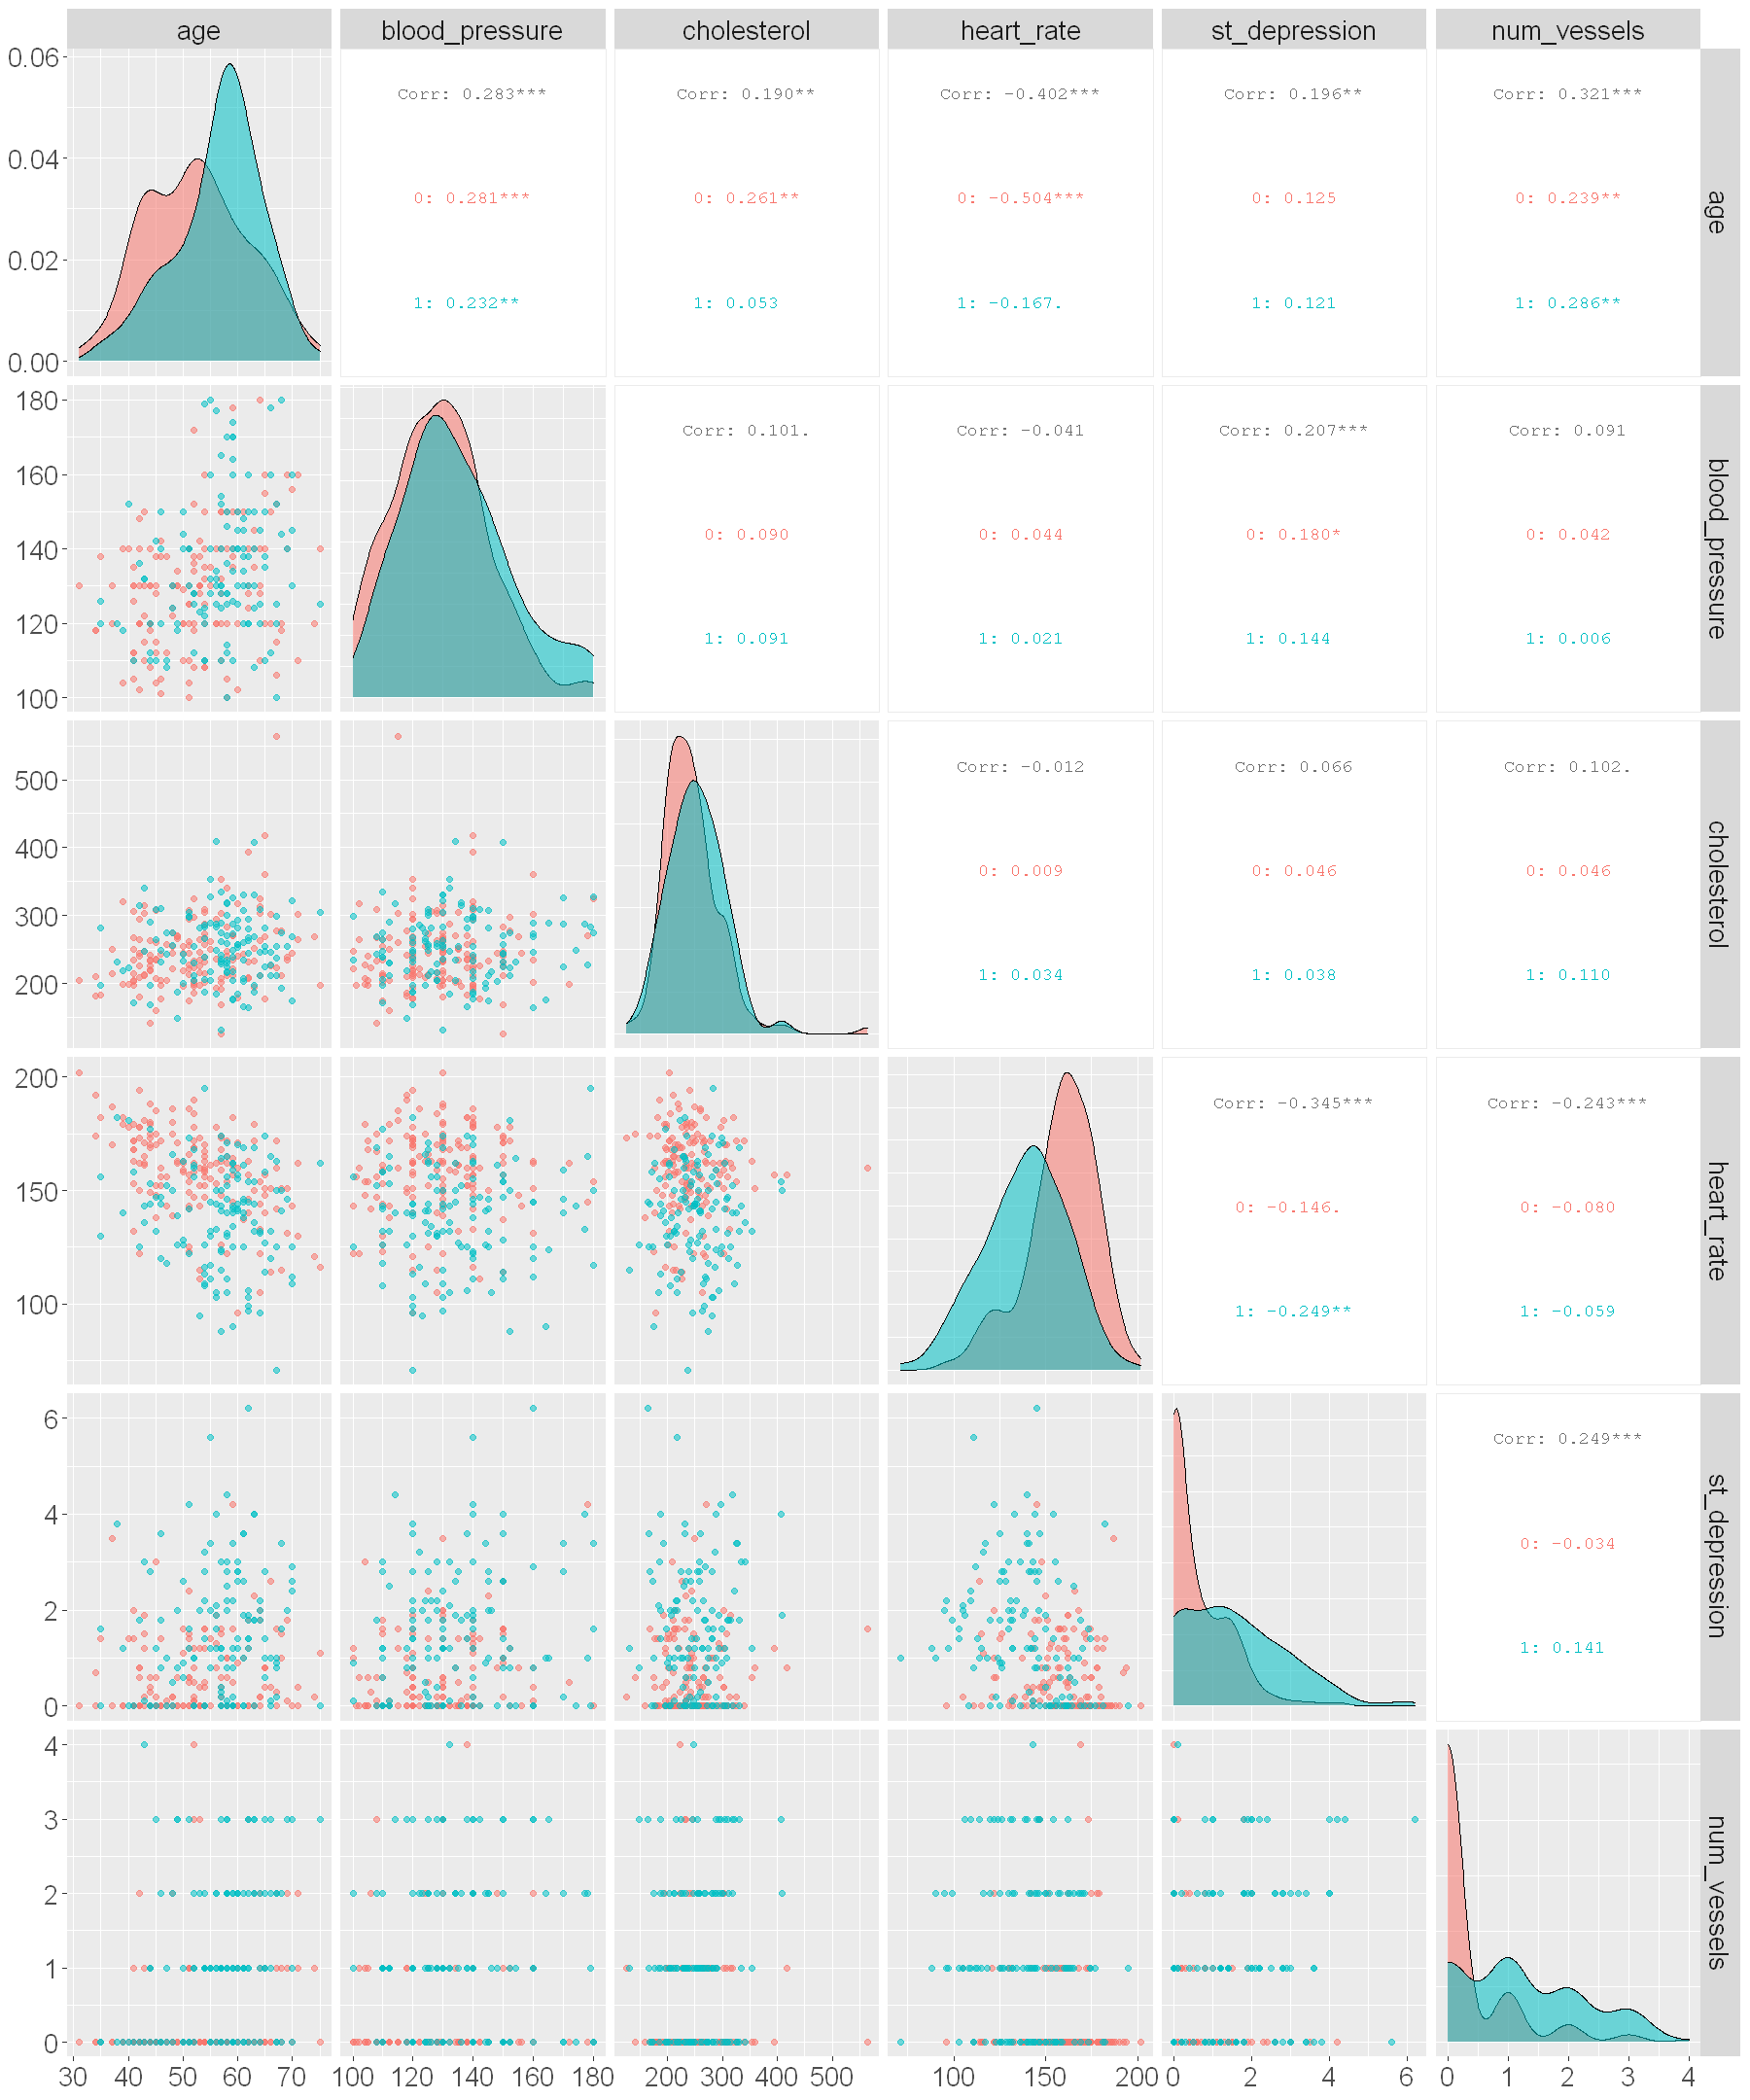

In [750]:
train_cont <- train[,c(1,4,5,8,10,12,14)]
ggpairs(train_cont, columns = 1:6, mapping = aes(color = disease,alpha=0.8))+
    theme(text = element_text(size = 20))

## Diskrétní proměnné

Pro diskrétní proměnné se podíváme na bar ploty, které nám ukážou, jestli jsou počty v jednotlivých kategoriích rozdílné pro osobu s nemocí a bez nemoci.

In [751]:
train_fac <- train[,c(2,3,6,7,9,11,13,14)]
summary(train_fac)
levels(train_fac$chest_pain_type) <- c("asymptomatic", "atypical angina", "non-anginal pain", "typical angina")
levels(train_fac$blood_sugar) <- c("less than 120mg/ml", "more than 120mg/ml")
levels(train_fac$rest_ecg) <- c("showing hyperthrophy", "normal", "wave abnormality")
levels(train_fac$ex_angina) <- c("Yes", "No")
levels(train_fac$st_slope) <- c("downloping", "flat", "upsloping")
levels(train_fac$thal) <- c("0", "fixed defect", "normal", "reversable defect")
summary(train_fac)

     sex      chest_pain_type blood_sugar rest_ecg ex_angina st_slope thal   
 female: 90   0:130           0:231       0:131    0:183     0: 17    0:  2  
 male  :183   1: 42           1: 42       1:138    1: 90     1:125    1: 15  
              2: 79                       2:  4              2:131    2:151  
              3: 22                                                   3:105  
 disease
 0:150  
 1:123  
        
        

     sex              chest_pain_type             blood_sugar 
 female: 90   asymptomatic    :130    less than 120mg/ml:231  
 male  :183   atypical angina : 42    more than 120mg/ml: 42  
              non-anginal pain: 79                            
              typical angina  : 22                            
                 rest_ecg   ex_angina       st_slope                  thal    
 showing hyperthrophy:131   Yes:183   downloping: 17   0                :  2  
 normal              :138   No : 90   flat      :125   fixed defect     : 15  
 wave abnormality    :  4             upsloping :131   normal           :151  
                                                       reversable defect:105  
 disease
 0:150  
 1:123  
        
        

V bar plotech níže můžeme vidět nejen rozdělení do jednotlivých faktorů podle toho, jestli má daná osoba srdeční vadu, ale také vidíme celkové počty v jednotlivých levelech kategorické proměnné. To nám umožňuje porovnávat i počty v jednotlivých kategoriích.

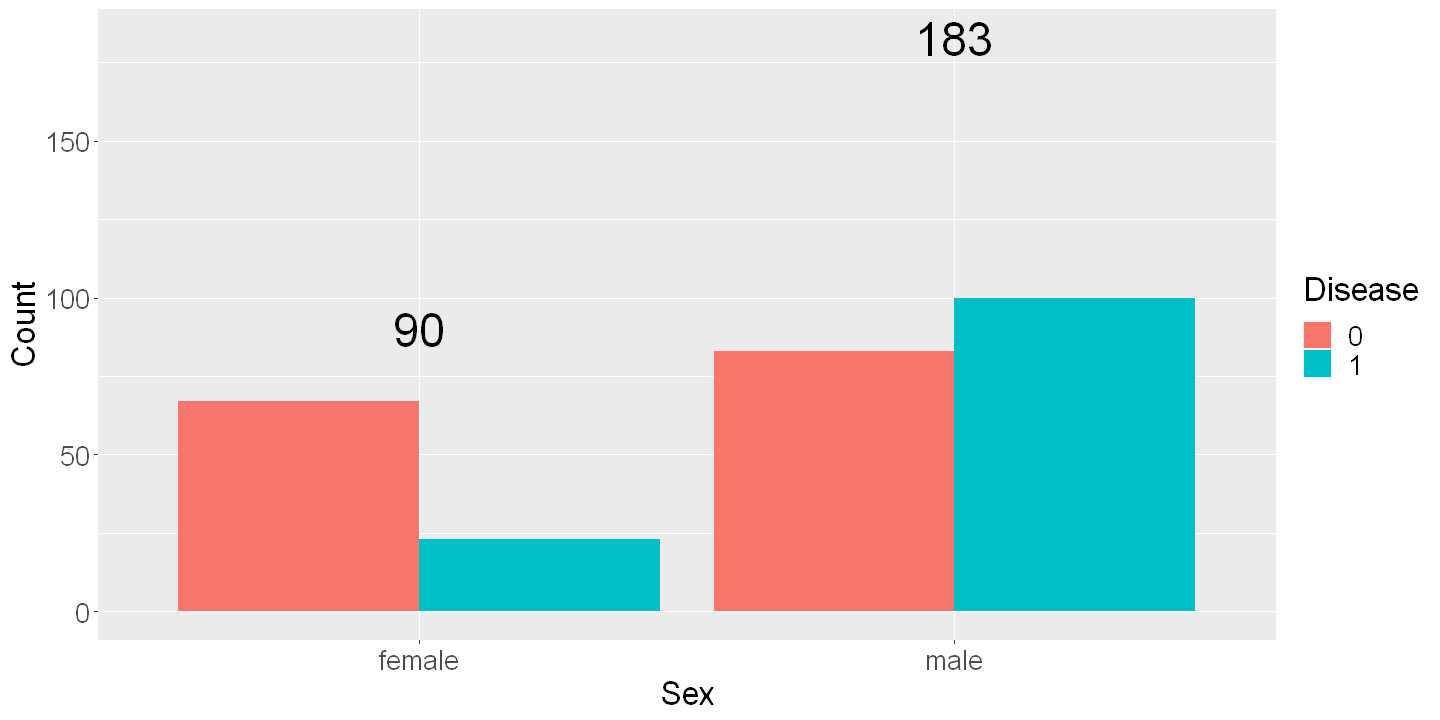

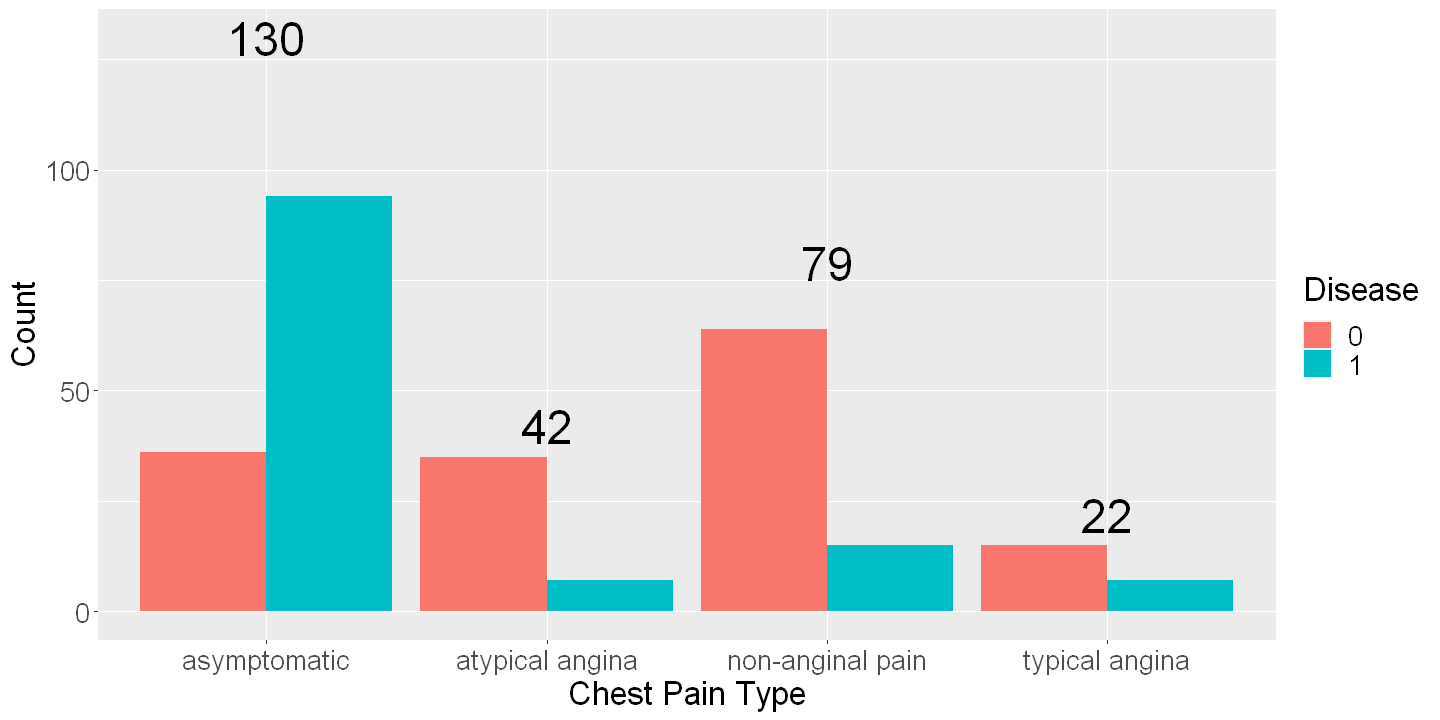

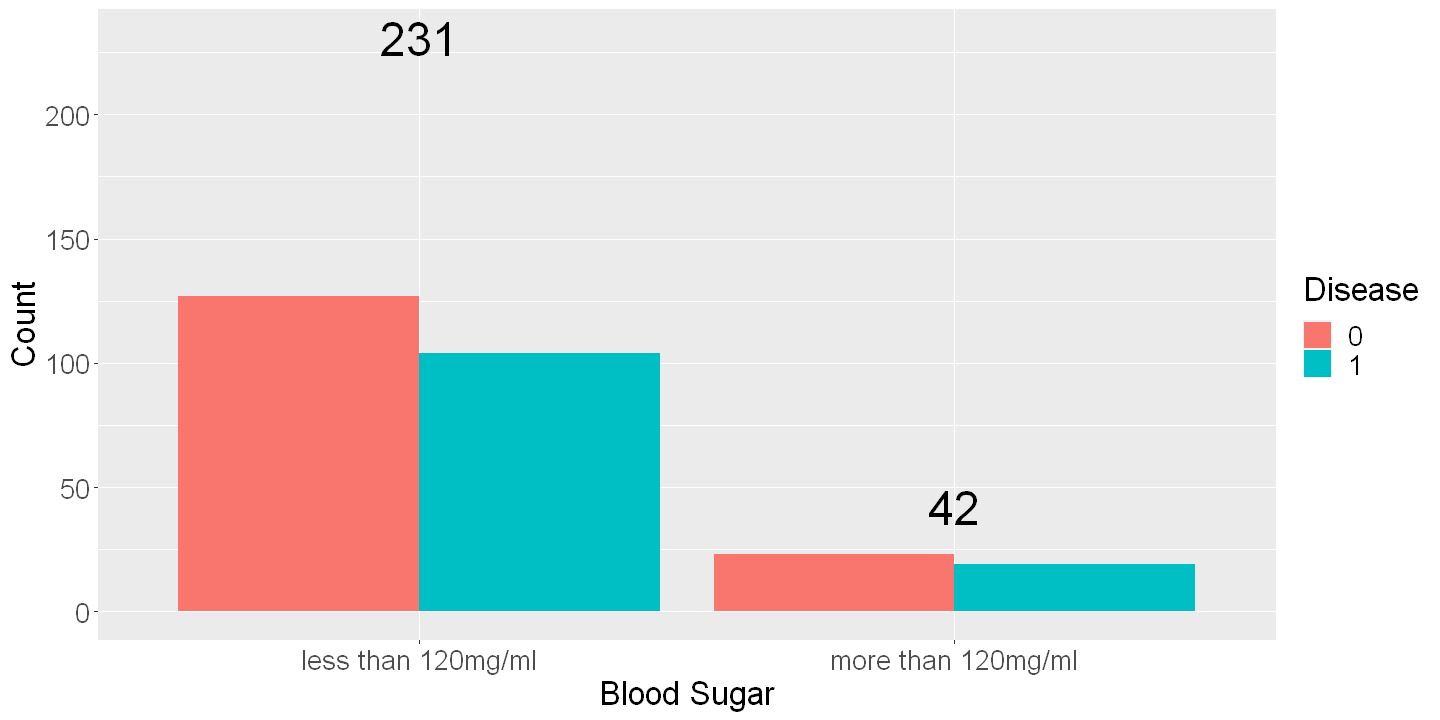

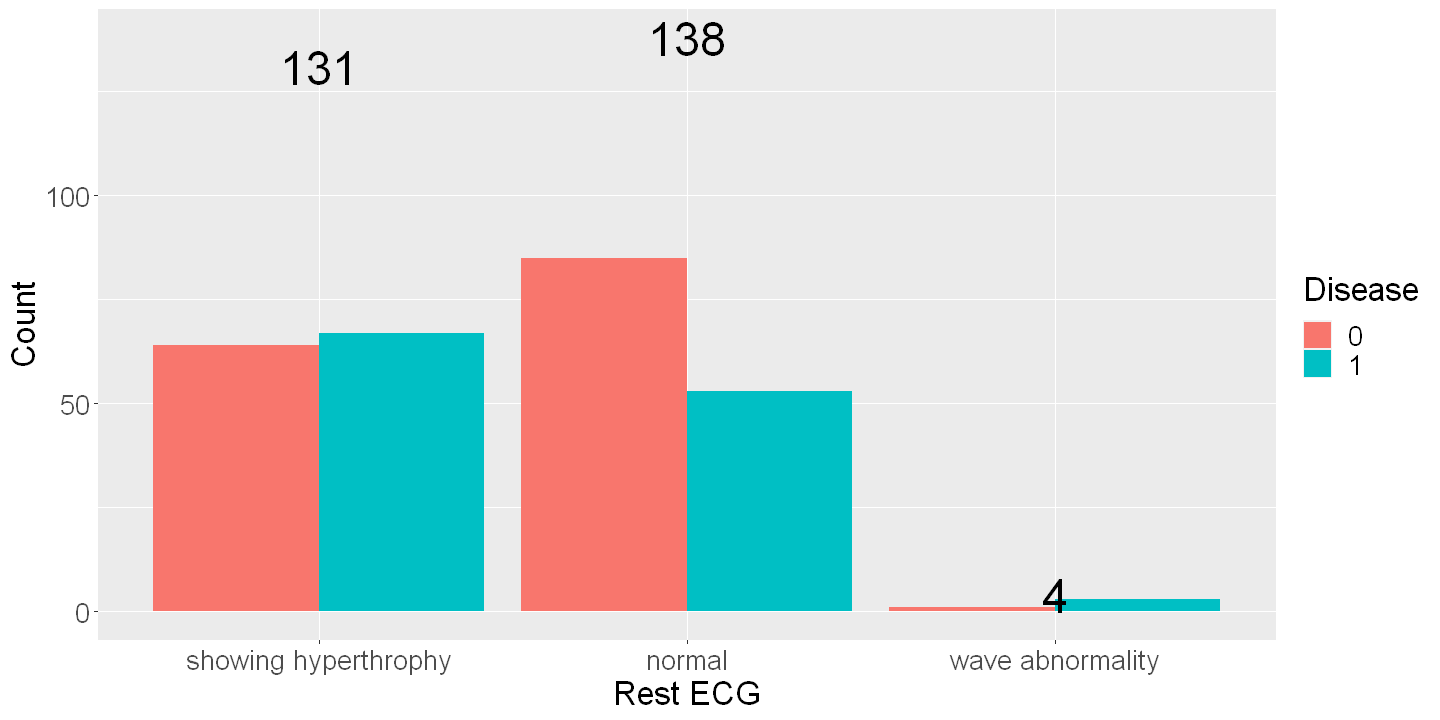

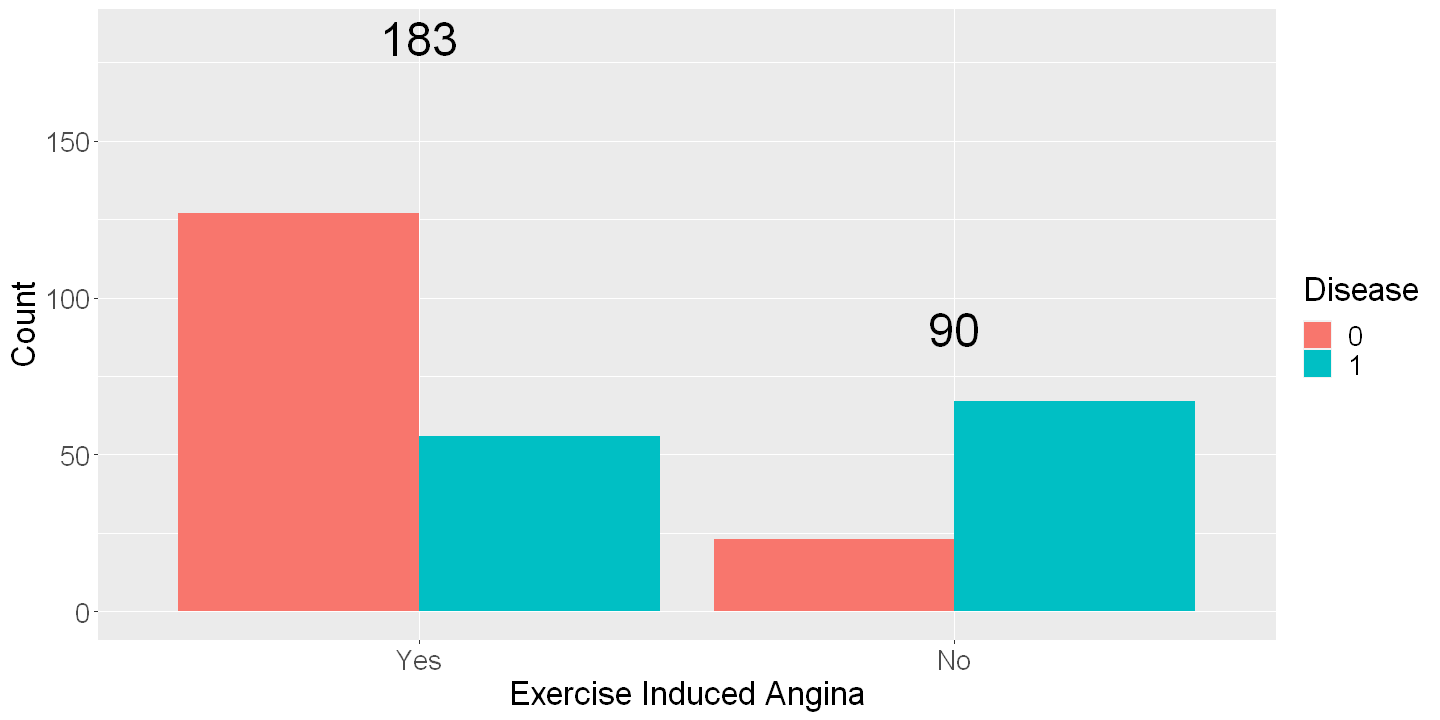

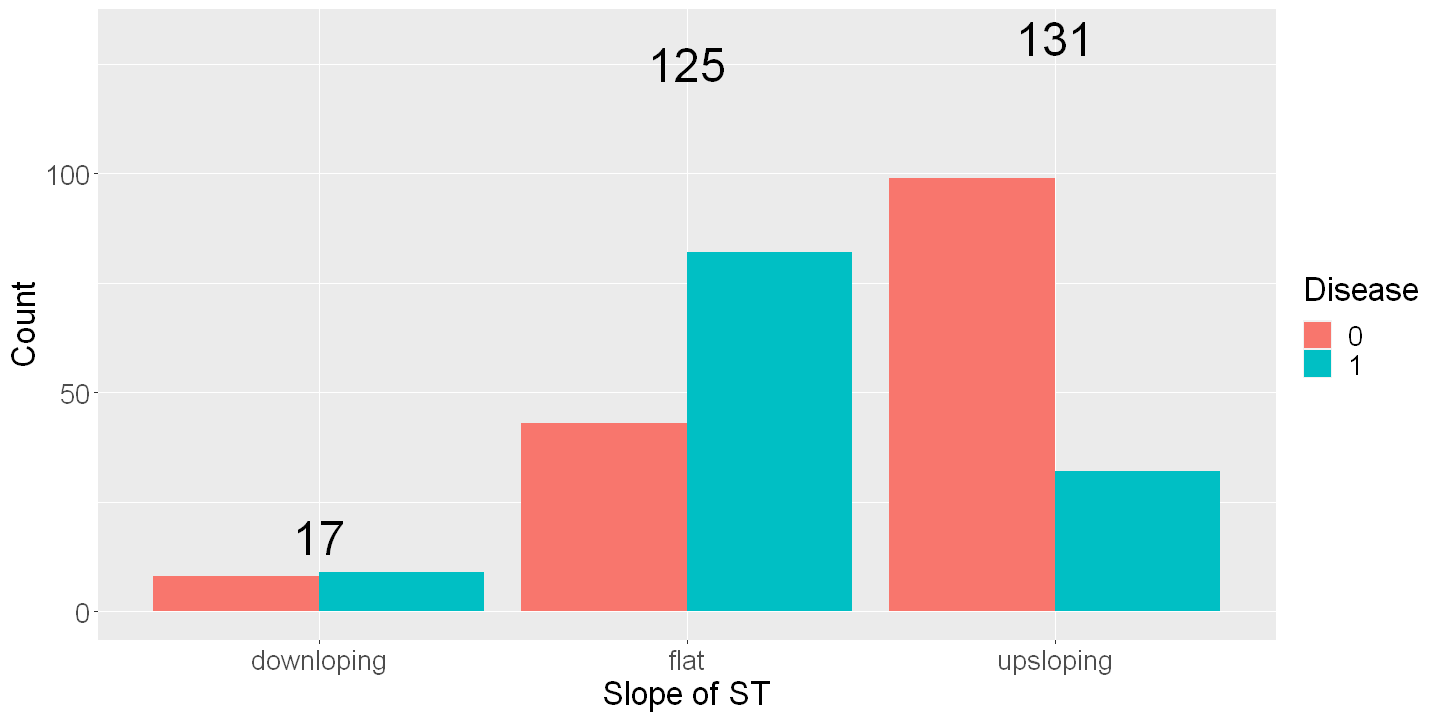

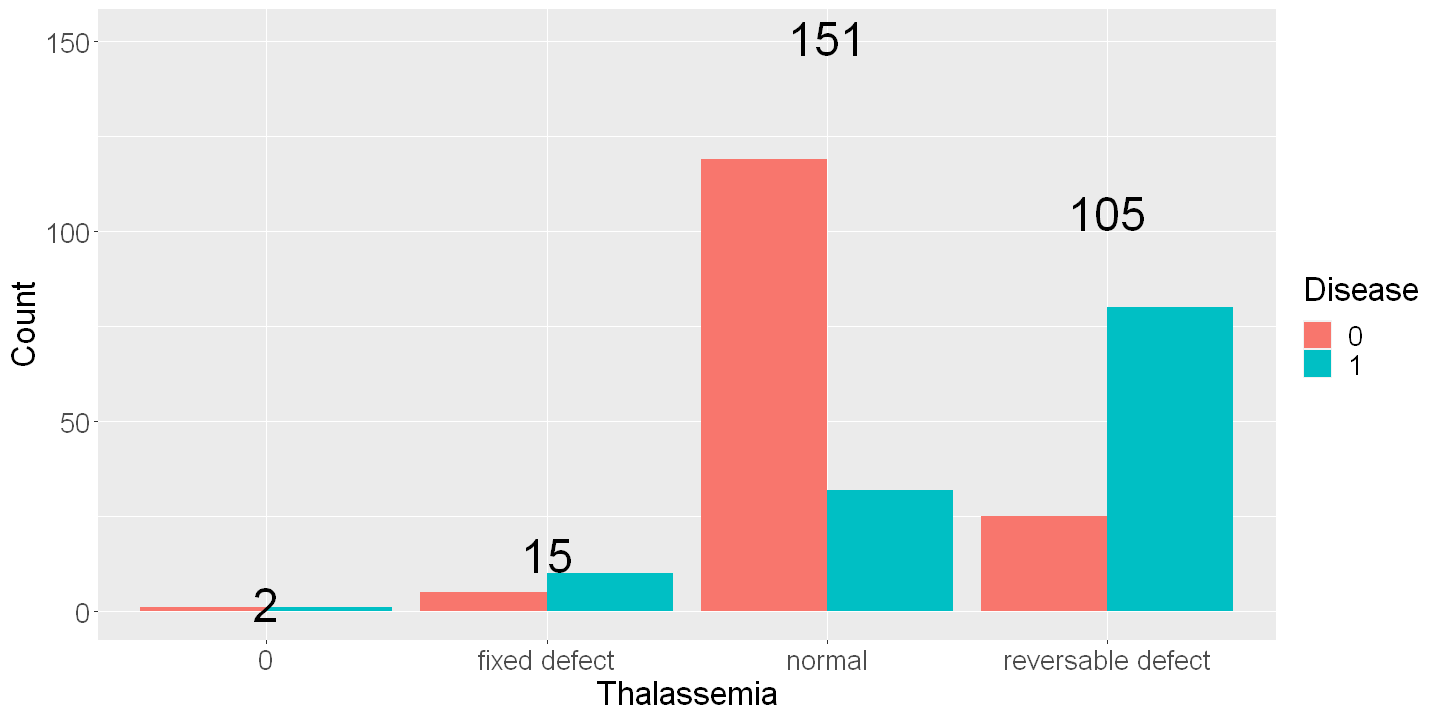

In [752]:
options(repr.plot.width=12, repr.plot.height=6)

ggplot(data=train_fac) +
    geom_bar(aes(x=sex, fill=disease),position=position_dodge()) +
    geom_text(stat='count', aes(x=sex, label=..count..), color="black",
            position = position_dodge(0.9), size=10) +
    theme(text = element_text(size = 20)) +
    labs(x = "Sex", y = "Count", fill="Disease")

ggplot(data=train_fac) +
    geom_bar(aes(x=chest_pain_type, fill=disease),position=position_dodge()) +
    theme(text = element_text(size = 20)) +
geom_text(stat='count', aes(x=chest_pain_type, label=..count..), color="black",
            position = position_dodge(0.9), size=10) +
    labs(x = "Chest Pain Type", y = "Count", fill="Disease")

ggplot(data=train_fac) +
    geom_bar(aes(x=blood_sugar, fill=disease),position=position_dodge()) +
    theme(text = element_text(size = 20)) +
geom_text(stat='count', aes(x=blood_sugar, label=..count..), color="black",
            position = position_dodge(0.9), size=10) +
    labs(x = "Blood Sugar", y = "Count", fill="Disease")

ggplot(data=train_fac) +
    geom_bar(aes(x=rest_ecg, fill=disease),position=position_dodge()) +
geom_text(stat='count', aes(x=rest_ecg, label=..count..), color="black",
            position = position_dodge(0.9), size=10) +
    theme(text = element_text(size = 20)) +
    labs(x = "Rest ECG", y = "Count", fill="Disease")

ggplot(data=train_fac) +
    geom_bar(aes(x=ex_angina, fill=disease),position=position_dodge()) +
    theme(text = element_text(size = 20)) +
geom_text(stat='count', aes(x=ex_angina, label=..count..), color="black",
            position = position_dodge(0.9), size=10) +
    labs(x = "Exercise Induced Angina", y = "Count", fill="Disease")

ggplot(data=train_fac) +
    geom_bar(aes(x=st_slope, fill=disease),position=position_dodge()) +
    theme(text = element_text(size = 20)) +
geom_text(stat='count', aes(x=st_slope, label=..count..), color="black",
            position = position_dodge(0.9), size=10) +
    labs(x = "Slope of ST", y = "Count", fill="Disease")

ggplot(data=train_fac) +
    geom_bar(aes(x=thal, fill=disease),position=position_dodge()) +
    theme(text = element_text(size = 20)) +
geom_text(stat='count', aes(x=thal, label=..count..), color="black",
            position = position_dodge(0.9), size=10) +
    labs(x = "Thalassemia", y = "Count", fill="Disease")


Z grafů můžeme například vidět, že ženy mají obecně mnohem méně případů onemocnění srdce než muži. Zároveň máme mnohem méně měření pro ženy než pro muže, což bychom měli brát v potaz, stejně jako u jiných kategorií. Z barplotů lze vyčíst souvislost vady s faktory jako je nemoc Thalassemia, směrnice měření ST nebo přítomnost exercise induced angina. Proměnné ECG a blood sugar nevypadají, že by měly zásadní vliv na onemocnění.

# 02 - Logistická regrese (agregovaná tabulková data)

Pro tento úkol jsou použita data z `data_table`. Tato tabulka má pouze dvě vysvětlující proměnné: age & blood_pressure, upravená pro vytvoření binomického modelu.

In [753]:
data_table <- data_train %>%
   dplyr::select(age, sex, blood_pressure,disease) %>%
   mutate(age             = cut(age, breaks=c(-Inf, 44,60, Inf),labels=c("30-45","45-60","60-75")),
          blood_pressure  = cut(blood_pressure, breaks=c(-Inf, 120,130,140,Inf),labels=c("100-120","121-130","131-140","140-180"))) %>%
  group_by(age,blood_pressure) %>%
  summarise(n = n(),
         disease_yes = sum(disease),
         disease_no = n - sum(disease)
        )        
data_table
summary(data_table)

`summarise()` has grouped output by 'age'. You can override using the `.groups` argument.



age,blood_pressure,n,disease_yes,disease_no
<fct>,<fct>,<int>,<int>,<int>
30-45,100-120,26,7,19
30-45,121-130,11,1,10
30-45,131-140,9,3,6
30-45,140-180,3,1,2
45-60,100-120,44,15,29
45-60,121-130,42,22,20
45-60,131-140,35,14,21
45-60,140-180,33,21,12
60-75,100-120,18,9,9


    age    blood_pressure       n          disease_yes      disease_no   
 30-45:4   100-120:3      Min.   : 3.00   Min.   : 1.00   Min.   : 2.00  
 45-60:4   121-130:3      1st Qu.:12.50   1st Qu.: 6.00   1st Qu.: 6.75  
 60-75:4   131-140:3      Median :21.00   Median : 8.50   Median :10.00  
           140-180:3      Mean   :22.75   Mean   :10.25   Mean   :12.50  
                          3rd Qu.:33.50   3rd Qu.:14.25   3rd Qu.:19.25  
                          Max.   :44.00   Max.   :22.00   Max.   :29.00  

Podíváme se nejdříve, jak vypadají data, jaká je závislost nemoci na vysvětlujících proměnných. Je třeba si uvědomit, že naše tabulka je binomická, tedy máme počet pacientů v každé kombinaci faktorů plus počet lidí se srdeční vadou a bez. Vizualizaci můžeme provést například tak, že budeme řešit, jak se mění procento pacientů se srdeční vadou v dané skupině podle faktorových proměnných.

Níže vidíme závislost na věku a krevním tlaku, kde vysvětlovaná veličina je procentuální zastoupení nemocných osob ve skupině. Z obrázků se zdá, že pravděpodobnost srdeční vady roste s věkem (po započítání efektu krevního tlaku). Nicméně u krevního tlaku již není přímo vidět závislost, ať už rostoucí nebo klesající.

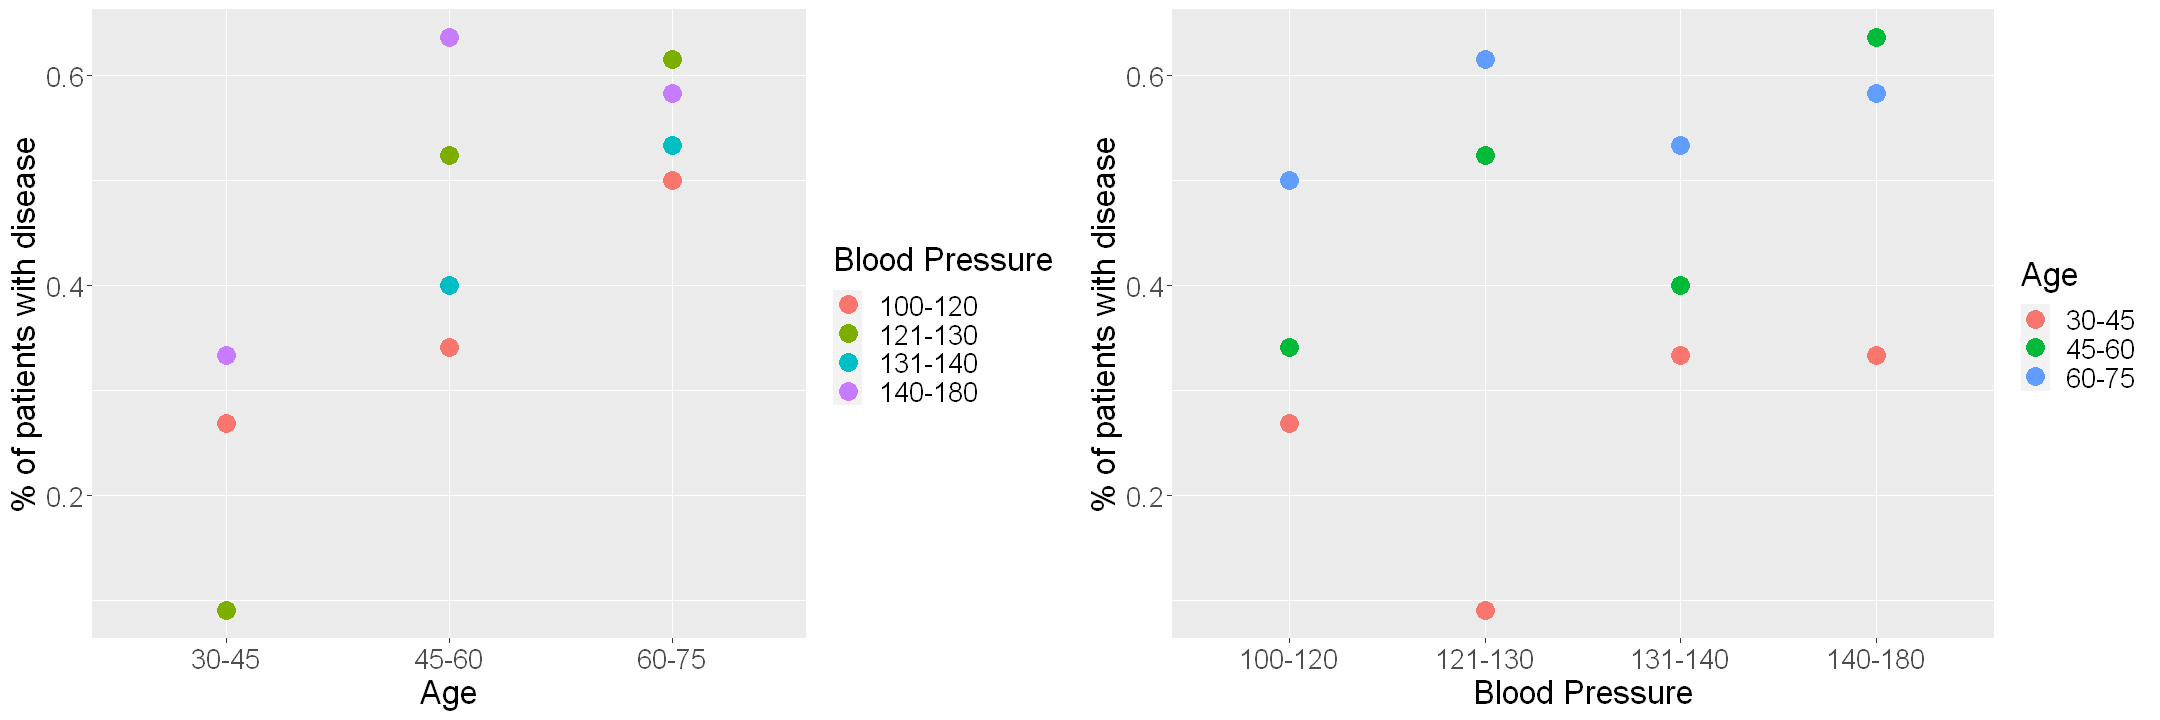

In [754]:
options(repr.plot.width=18, repr.plot.height=6)

po1 <- ggplot(data_poisson, aes(x=age, y=disease_yes/n, color=blood_pressure)) +
    geom_point(size = 5) +
    labs(x="Age", y="% of patients with disease", color="Blood Pressure") +
    theme(text = element_text(size=20))
    
po2 <- ggplot(data_poisson, aes(x=blood_pressure, y=disease_yes/n, color=age)) +
    geom_point(size = 5) +
    labs(x="Blood Pressure", y="% of patients with disease", color="Age") +
    theme(text = element_text(size=20))

ggarrange(po1,po2,nrow=1,ncol=2)

## Nulový model

Nejdříve sestavíme nulový model. Jelikož máme data v tabulce jako binomická, použijeme funkci `glm()` následovně:

In [755]:
mod0 = glm(cbind(disease_yes, disease_no) ~ 1,family = binomial(link="logit"), data_table)
summary(mod0)


Call:
glm(formula = cbind(disease_yes, disease_no) ~ 1, family = binomial(link = "logit"), 
    data = data_table)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.62094  -0.90664   0.00366   1.01158   2.14391  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.1985     0.1216  -1.631    0.103

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance: 22.944  on 11  degrees of freedom
AIC: 63.959

Number of Fisher Scoring iterations: 3


Vidíme, že nulový model zamítá významnost interceptu a hodnota AIC statistiky je cca. 64. Pro výskyt onemocnění v populaci tak dostáváme:

In [756]:
print("Šance na srdeční vadu:")
exp(coef(mod0))
print("Pravděpodobnost srdeční vady:")
exp(coef(mod0))/(1+exp(coef(mod0)))

[1] "Šance na srdeční vadu:"


(Intercept) 
       0.82

[1] "Pravděpodobnost srdeční vady:"


(Intercept) 
  0.4505495

## Model závislosti onemocnění na tlaku

Budeme dále studovat závislost výskytu nemoci na tlaku. Tlak je zde faktorová proměnná rozdělená do čtyř kategorií:
- 100-120
- 120-130
- 130-140
- 140-180

Referenční kategorií bude první z nich.

In [757]:
mod_tlak = glm(cbind(disease_yes, disease_no) ~ blood_pressure,family = binomial, data_table)
summary(mod_tlak)
exp(coef(mod_tlak))


Call:
glm(formula = cbind(disease_yes, disease_no) ~ blood_pressure, 
    family = binomial, data = data_table)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7378  -0.6432  -0.1623   0.7396   1.2822  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)   
(Intercept)            -0.6091     0.2232  -2.729  0.00635 **
blood_pressure121-130   0.4877     0.3326   1.466  0.14257   
blood_pressure131-140   0.3016     0.3453   0.873  0.38242   
blood_pressure140-180   1.0145     0.3453   2.938  0.00330 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance: 13.784  on  8  degrees of freedom
AIC: 60.799

Number of Fisher Scoring iterations: 4


(Intercept) blood_pressure121-130 blood_pressure131-140 
            0.5438596             1.6285714             1.3519924 
blood_pressure140-180 
            2.7580645

Jak můžeme vidět, model se zdá být lepší než nulový model (nižší hodnota AIC statistiky, nižší deviace). Tlak jako proměnná se zdá být vlivná pouze pro tlak vyšší než 140 a pro zbylé dvě kategorie není signifikantní rozdíl vůči referenční kategorii.

Pro tento konkrétní model by mělo platit, že osoby s tlakem 121-130 mají 1.6x větší šanci na onemocnění, pacienti s 131-140 oproti tomu menší, 1.35x větší šanci než ti s nízkým tlakem. Nejvyšší relativní riziko má kategorie s vysokým tlakem 140-180, která má oproti lidem s nejnižším tlakem 2.75x větší šanci na srdeční onemocnění. (Vše bráno vůči referenční kategorii s tlakem 100-120.)

Zkusme si ještě pohrát s proměnnou tlak, kdy se zdá, že mezi tlaky 100-120, 121-130 a 131-140 není signifikantní rozdíl.

In [758]:
data_table2 <- mutate(data_table, blood_pressure = fct_recode(blood_pressure, "100-120" = "121-130", "100-120" = "131-140"))
levels(data_table2$blood_pressure) <- c("100-140", "141-180")
summary(data_table2)

    age    blood_pressure       n          disease_yes      disease_no   
 30-45:4   100-140:9      Min.   : 3.00   Min.   : 1.00   Min.   : 2.00  
 45-60:4   141-180:3      1st Qu.:12.50   1st Qu.: 6.00   1st Qu.: 6.75  
 60-75:4                  Median :21.00   Median : 8.50   Median :10.00  
                          Mean   :22.75   Mean   :10.25   Mean   :12.50  
                          3rd Qu.:33.50   3rd Qu.:14.25   3rd Qu.:19.25  
                          Max.   :44.00   Max.   :22.00   Max.   :29.00  

In [759]:
mod_tlak2 = glm(cbind(disease_yes, disease_no) ~ blood_pressure,family = binomial, data_table2)

summary(mod_tlak2)
exp(coef(mod_tlak2))


Call:
glm(formula = cbind(disease_yes, disease_no) ~ blood_pressure, 
    family = binomial, data = data_table2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3641  -0.9236  -0.1341   0.8311   1.5061  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)   
(Intercept)            -0.3704     0.1394  -2.657  0.00788 **
blood_pressure141-180   0.7758     0.2981   2.602  0.00926 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance: 16.022  on 10  degrees of freedom
AIC: 59.036

Number of Fisher Scoring iterations: 4


(Intercept) blood_pressure141-180 
            0.6904762             2.1724138

Získali jsme tak model, kde jsou intercept i parametr pro faktorovou proměnnou tlak významné. Vychází nám trochu jiný závěr a to takový, že lidé s tlakem vyšším než 140 mají 2.17x vyšší šanci na srdeční onemocnění než lidé s tlakem nižším než 140.

## Model závislosti onemocnění na věku

Teď se podíváme na model, ve kterém budeme brát jako vysvětlující proměnnou věk. Věkové skupiny zde máme tři:
- 30-45
- 45-60
- 60-75

Zastoupení ve všech skupinách je stejné, máme 4 jedince v každé kategorii.

In [760]:
mod_vek = glm(cbind(disease_yes, disease_no) ~ age,family = binomial, data_table)
summary(mod_vek)
exp(coef(mod_vek))


Call:
glm(formula = cbind(disease_yes, disease_no) ~ age, family = binomial, 
    data = data_table)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7024  -0.5659   0.2722   0.4678   1.9483  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.1260     0.3322  -3.390 0.000700 ***
age45-60      0.9960     0.3694   2.696 0.007012 ** 
age60-75      1.3556     0.4102   3.305 0.000951 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance: 10.677  on  9  degrees of freedom
AIC: 55.692

Number of Fisher Scoring iterations: 4


(Intercept)    age45-60    age60-75 
  0.3243243   2.7073171   3.8790323

Z modelu můžeme vidět, že všechny proměnné jsou signifikantní na hladině významnosti $\alpha = 0.01$. Šance pro skupiny 45-60 a 60-75 jsou vůči referenční kategorii 30-45. Rozdíl mezi 2. a 3. kategorií tak musíme spočítat jako rozdíl koeficientů pro druhou a třetí věkovou kategorii:

In [761]:
b2 <- coef(mod_vek)[2]
b3 <- coef(mod_vek)[3]

exp(b3-b2)

age60-75 
1.432796

Lidé z věkové skupiny 60-75 mají tak 1.4x větší šanci na srdeční vadu než ti z věkové skupiny 45-60.

## Numerický model

V dalším úkolu převedeme kategorie věku a tlaku do numerických proměnných jako středy v těchto kategoriích a vytvoříme numerický model, kde předpokládáme exponenciální závislost na tlaku a věku.

In [762]:
data_num <- data_table
levels(data_num$age) <- c((45+30)/2, (60+45)/2, (75+60)/2)
levels(data_num$blood_pressure) <- c((100+120)/2, (121+130)/2, (131+140)/2, (141+180)/2)
data_num$age <- as.numeric(as.character(data_num$age))
data_num$blood_pressure <- as.numeric(as.character(data_num$blood_pressure))
summary(data_num)

      age       blood_pressure        n          disease_yes      disease_no   
 Min.   :37.5   Min.   :110.0   Min.   : 3.00   Min.   : 1.00   Min.   : 2.00  
 1st Qu.:37.5   1st Qu.:121.6   1st Qu.:12.50   1st Qu.: 6.00   1st Qu.: 6.75  
 Median :52.5   Median :130.5   Median :21.00   Median : 8.50   Median :10.00  
 Mean   :52.5   Mean   :132.9   Mean   :22.75   Mean   :10.25   Mean   :12.50  
 3rd Qu.:67.5   3rd Qu.:141.8   3rd Qu.:33.50   3rd Qu.:14.25   3rd Qu.:19.25  
 Max.   :67.5   Max.   :160.5   Max.   :44.00   Max.   :22.00   Max.   :29.00  

In [763]:
mod_num = glm(cbind(disease_yes, disease_no) ~ age + blood_pressure,family = binomial, data_num)
summary(mod_num)


Call:
glm(formula = cbind(disease_yes, disease_no) ~ age + blood_pressure, 
    family = binomial, data = data_num)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6766  -0.4910  -0.1368   0.2533   1.3486  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -4.023230   1.048270  -3.838 0.000124 ***
age             0.035467   0.013367   2.653 0.007971 ** 
blood_pressure  0.014659   0.006913   2.121 0.033963 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.944  on 11  degrees of freedom
Residual deviance:  7.637  on  9  degrees of freedom
AIC: 52.651

Number of Fisher Scoring iterations: 4


Jak vidíme, máme model, kde numerické spojité proměnné `age` i `blood_pressure` jsou v modelu významné na hladině $\alpha = 0.05$. Pro poměr šancí pro spojitou proměnnou $x$, které odpovídá koeficient $\beta_1$ při rozdílu této veličiny o $c$ jednotek bude

$$\exp(c \cdot \beta_1)$$

Poměr šancí pro pacienty se stejným srdečním tlakem se pro pacienty lišící se o deset let se tak bude rovnat

In [764]:
exp(10*coef(mod_num)[2])

age 
1.425705

tedy pacient o deset let starší bude mít 1.4x větší šanci na srdeční chorobu.

Můžeme se ještě podívat, jestli by si v numerických datech zahrála interakce vysvětlujících proměnných:

In [765]:
mod_int = glm(cbind(disease_yes, disease_no) ~ age * blood_pressure,family = binomial, data_num)
summary(mod_int)


Call:
glm(formula = cbind(disease_yes, disease_no) ~ age * blood_pressure, 
    family = binomial, data = data_num)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6577  -0.4937  -0.2833   0.4326   1.3100  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)
(Intercept)        -7.9485179  5.2723082  -1.508    0.132
age                 0.1064499  0.0942134   1.130    0.259
blood_pressure      0.0453111  0.0408343   1.110    0.267
age:blood_pressure -0.0005519  0.0007233  -0.763    0.445

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 22.9445  on 11  degrees of freedom
Residual deviance:  7.0546  on  8  degrees of freedom
AIC: 54.069

Number of Fisher Scoring iterations: 4


Vidíme, že interakce je nevýznamná proměnná a předchozí model je tedy výrazně lepším.

Máme navíc vytvořit saturovaný model. U toho se musíme vrátit zpět k faktorovým proměnným. Je třeba zmínit, že pokud přecházíme u saturovaného modelu zpět k faktorovým proměnným, nedává smysl testovat vůči sobě model `mod_num` a `mod_saturated`, jelikož každý pracuje s jinými proměnnými (faktorové vs numerické). Mohli bychom však saturovaný model testovat oproti `mod_tlak` nebo `mod_vek`.

In [766]:
mod_saturated <- glm(cbind(disease_yes, disease_no) ~ age * blood_pressure,family = binomial, data_table)
summary(mod_saturated)


Call:
glm(formula = cbind(disease_yes, disease_no) ~ age * blood_pressure, 
    family = binomial, data = data_table)

Deviance Residuals: 
 [1]  0  0  0  0  0  0  0  0  0  0  0  0

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)  
(Intercept)                    -0.99853    0.44214  -2.258   0.0239 *
age45-60                        0.33928    0.54464   0.623   0.5333  
age60-75                        0.99853    0.64631   1.545   0.1224  
blood_pressure121-130          -1.30406    1.13820  -1.146   0.2519  
blood_pressure131-140           0.30538    0.83396   0.366   0.7142  
blood_pressure140-180           0.30538    1.30211   0.235   0.8146  
age45-60:blood_pressure121-130  2.05861    1.22151   1.685   0.0919 .
age60-75:blood_pressure121-130  1.77406    1.35746   1.307   0.1912  
age45-60:blood_pressure131-140 -0.05160    0.95691  -0.054   0.9570  
age60-75:blood_pressure131-140 -0.17185    1.08884  -0.158   0.8746  
age45-60:blood_pressure140-180  0

# 04 - Logistická regrese - statistika

## Závislost na pohlaví

Prvním úkolem je vypsat kontingenční tabulku pro pohlaví a onemocnění, spočítat poměr šancí (s konfidenčními intervaly) a pravděpodobnost onemocnění pro ženy a muže. Používáme již znovu trénovací data. Používat budeme verzi `train`, která už má převedené faktorové proměnné na faktory.

Kontingenční tabulka bude vypadat následovně:

In [767]:
data_sex <- train[,c("sex", "disease")]
tsex <- table(data_sex)
tsex

        disease
sex        0   1
  female  67  23
  male    83 100

Vytvoříme ještě funkce, které pak budeme dále používat pro výpočet statistik.

In [768]:
# OR funkce
OR <- function(tab){tab[1,1]/tab[1,2]/(tab[2,1]/tab[2,2])}
ORn <- function(var, tab){tab[1,1]/tab[1,2]/(tab[var,1]/tab[var,2])}
OR_coef <- function(variable,model,CI){
  param <- coef(model)
  where <- grep(variable,names(param))[1]
  beta  <- param[where]
  se <- summary(model)$coef[where,2]
  or <- exp(beta)
  ci <- exp(beta+c(-1,1)*qnorm(CI/2+0.5)*se)
  out <- data.frame(or,ci[1],ci[2])
  names(out) <- c("OR","LCL","UCL")
  out
}
OR_coefn <- function(variable,model,CI,n){
  param <- coef(model)
  where <- grep(variable,names(param))[n]
  beta  <- param[where]
  se <- summary(model)$coef[where,2]
  or <- exp(beta)
  ci <- exp(beta+c(-1,1)*qnorm(CI/2+0.5)*se)
  out <- data.frame(or,ci[1],ci[2])
  names(out) <- c("OR","LCL","UCL")
  out
}

P_table <- function(var, table) {
    round(table[var,2]/(table[var,1] + table[var,2]),3)
}

Spočítáme teď poměr šancí pro ženy oproti mužům a obecně pravděpodobnost onemocnění pro ženy a muže. Vidíme, že muži mají zhruba 3.5x větší riziko onemocnění než ženy, ženy mají také obecně nižší riziko onemocnění než muži.

In [769]:
print("Poměr šancí na onemocnění pro muže oproti ženám:")
OR(table(data_sex))

print("Pravděpodobnost onemocnění pro muže:")
P_table("male", table(data_sex))

print("Pravděpodobnost onemocnění pro ženy:")
P_table("female", table(data_sex))

[1] "Poměr šancí na onemocnění pro muže oproti ženám:"


[1] 3.509691

[1] "Pravděpodobnost onemocnění pro muže:"


[1] 0.546

[1] "Pravděpodobnost onemocnění pro ženy:"


[1] 0.256

Vytvoříme teď model logistické regrese s vysvětlující proměnnou `sex` a porovnáme s výsledky získanými z kontingenční tabulky.

In [770]:
mod_sex = glm(disease ~ sex,family = binomial, data_sex)
summary(mod_sex)

print("Koeficienty: intercept a poměr šancí pro muže oproti ženám")
exp(coef(mod_sex))

print("Konfidenční interval pro poměr šancí")
OR_coef("sex",mod_sex,0.95)


Call:
glm(formula = disease ~ sex, family = binomial, data = data_sex)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2575  -1.2575  -0.7683   1.0994   1.6519  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0692     0.2417  -4.424 9.68e-06 ***
sexmale       1.2555     0.2836   4.426 9.58e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 375.78  on 272  degrees of freedom
Residual deviance: 354.41  on 271  degrees of freedom
AIC: 358.41

Number of Fisher Scoring iterations: 4


[1] "Koeficienty: intercept a poměr šancí pro muže oproti ženám"


(Intercept)     sexmale 
  0.3432836   3.5096909

[1] "Konfidenční interval pro poměr šancí"


,OR,LCL,UCL
,<dbl>,<dbl>,<dbl>
sexmale,3.509691,2.012954,6.119329


Z modelu vidíme, že je signifikantní rozdíl mezi pravděpodobností onemocnění pro muže a ženy. Poměr šancí je stejný jako z kontingenční tabulky, což je vlastností takto definovaného logistického modelu.

Spočítán byl také 95% konfidenční interval pro poměr šancí. Na něm vidíme, že jistě je OR pro muže vyšší než jedna a je zde tedy signifikantní rozdíl. Muži mají nejméně 2x větší riziko na srdeční vadu než ženy.

## Závislost na `chest_pain_type`

Druhým úkolem v této úloze je stejná analýza jako v úkolu předchozím, ovšem pro vysvětlující proměnnou `chest_pain_type`. Typ bolesti na hrudi má celkem 4 úrovně:

0. asymptomatic
1. atypical angina
2. non-anginal pain
3. typical angina

Kontingenční tabulka má tak rozměr 4x2, jak můžeme vidět zde:

In [771]:
tpain <- train[,c("chest_pain_type", "disease")]
table(tpain)

               disease
chest_pain_type  0  1
              0 36 94
              1 35  7
              2 64 15
              3 15  7

Pro poměr šancí je třeba určit referenční kategorii, tou bude typ 0. Spočítáme pravděpodobnosti onemocnění pro dané typy a poté poměr šancí vůči typu 0.

In [772]:
print("Pravděpodobnost onemocnění:")
for (i in 0:3) {
    print(c("Chest pain type:", i))
    print(P_table(i+1, table(tpain)))
}

[1] "Pravděpodobnost onemocnění:"
[1] "Chest pain type:" "0"               
[1] 0.723
[1] "Chest pain type:" "1"               
[1] 0.167
[1] "Chest pain type:" "2"               
[1] 0.19
[1] "Chest pain type:" "3"               
[1] 0.318


In [773]:
print("Poměr šancí vůči asymptomatické bolesti na hrudi:")
for (i in 1:3) {
    print(c("Chest pain type:", i))
    print(ORn(i+1, table(tpain)))
}

[1] "Poměr šancí vůči asymptomatické bolesti na hrudi:"
[1] "Chest pain type:" "1"               
[1] 0.07659574
[1] "Chest pain type:" "2"               
[1] 0.08976064
[1] "Chest pain type:" "3"               
[1] 0.1787234


Vidíme, že poměr šancí je takový, že všechny ostatní typy bolestí mají oproti asymptomatické nižší riziko onemocnění. Nejvyšší riziko proti typu 0 má typ 3 (typical angina), a to 17%.

Sestavíme také logistický model pro `chest_pain_type` jako vysvětlující proměnnou a spočítáme i konfidenční intervaly pro poměr šancí:

In [775]:
mod_pain = glm(disease ~ chest_pain_type,family = binomial, tpain)
summary(mod_pain)

print("Koeficienty: intercept a poměr šancí pro muže oproti ženám")
exp(coef(mod_pain))

print("Konfidenční intervaly pro poměr šancí vůči referenční kategorii 0:")
rbind(OR_coefn("chest_pain_type",mod_pain,0.95,1),
    OR_coefn("chest_pain_type",mod_pain,0.95,2),
    OR_coefn("chest_pain_type",mod_pain,0.95,3))


Call:
glm(formula = disease ~ chest_pain_type, family = binomial, data = tpain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6025  -0.6489  -0.6039   0.8053   1.8930  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.9598     0.1960   4.897 9.74e-07 ***
chest_pain_type1  -2.5692     0.4581  -5.609 2.04e-08 ***
chest_pain_type2  -2.4106     0.3474  -6.938 3.97e-12 ***
chest_pain_type3  -1.7219     0.4979  -3.458 0.000544 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 375.78  on 272  degrees of freedom
Residual deviance: 295.57  on 269  degrees of freedom
AIC: 303.57

Number of Fisher Scoring iterations: 4


[1] "Koeficienty: intercept a poměr šancí pro muže oproti ženám"


(Intercept) chest_pain_type1 chest_pain_type2 chest_pain_type3 
      2.61111111       0.07659574       0.08976064       0.17872340

[1] "Konfidenční intervaly pro poměr šancí vůči referenční kategorii 0:"


,OR,LCL,UCL
,<dbl>,<dbl>,<dbl>
chest_pain_type1,0.07659574,0.03120897,0.1879879
chest_pain_type2,0.08976064,0.04543106,0.1773450
chest_pain_type3,0.17872340,0.06735006,0.4742691


Z výsledků vidíme, že oproti asymptotické bolesti mají pacienti s jinými typy bolesti mnohem nižší riziko onemocnění srdce. Konfidenční intervaly potvrzují, že OR není rovno jedné ani pro jeden t dalších typů bolesti. Nejvyšší riziko po typu 0 má typ 3.

## Model se všemi proměnnými

Teď můžeme sestavit aditivní model, do kterého přidáme všechny dostupné proměnné a budeme poté postupně vyzařovat méně signifikanční proměnné, dokud nedostaneme model, se kterým budeme spokojení.

In [776]:
mod_all = glm(disease ~ .,family = binomial, train)
summary(mod_all)


Call:
glm(formula = disease ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6911  -0.4524  -0.1252   0.3125   3.0104  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1483565  3.4380234  -0.334  0.73837    
age              -0.0082288  0.0259906  -0.317  0.75154    
sexmale           1.3424529  0.5560457   2.414  0.01577 *  
chest_pain_type1 -1.0038524  0.6307405  -1.592  0.11149    
chest_pain_type2 -2.2385712  0.5542774  -4.039 5.37e-05 ***
chest_pain_type3 -1.9704863  0.6884946  -2.862  0.00421 ** 
blood_pressure    0.0274424  0.0121432   2.260  0.02383 *  
cholesterol       0.0007121  0.0044786   0.159  0.87367    
blood_sugar1     -0.5128527  0.6414440  -0.800  0.42398    
rest_ecg1        -0.6791562  0.4206847  -1.614  0.10644    
rest_ecg2        -0.0029048  2.4300232  -0.001  0.99905    
heart_rate       -0.0206869  0.0113446  -1.824  0.06823 .  
ex_angina1        0.5757

In [777]:
drop1(mod_all, test="Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,169.5169,209.5169,NA,NA
age,1,169.6173,207.6173,0.10046266,7.512751e-01
sex,1,175.7078,213.7078,6.19090638,1.284084e-02
chest_pain_type,3,190.7738,224.7738,21.25686532,9.310486e-05
blood_pressure,1,174.8350,212.8350,5.31807306,2.110534e-02
cholesterol,1,169.5420,207.5420,0.02509819,8.741226e-01
blood_sugar,1,170.1702,208.1702,0.65329800,4.189360e-01
rest_ecg,2,172.2231,208.2231,2.70624293,2.584323e-01
heart_rate,1,172.9935,210.9935,3.47659967,6.224251e-02


Proměnná cholesterol by měla za následek nejmenší nárůst deviace, vynecháme ji. Ve výsledném modelu vidíme, že jsme získali více proměnných na linii signifikantnosti. Budeme pokračovat v úpravě modelu.

In [778]:
# drop cholesterol
mod_new <- update(mod_all, ~ . - cholesterol)
summary(mod_new)


Call:
glm(formula = disease ~ age + sex + chest_pain_type + blood_pressure + 
    blood_sugar + rest_ecg + heart_rate + ex_angina + st_depression + 
    st_slope + num_vessels + thal, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6823  -0.4512  -0.1245   0.3135   3.0196  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.05803    3.39000  -0.312  0.75496    
age              -0.00765    0.02572  -0.297  0.76618    
sexmale           1.31740    0.53250   2.474  0.01336 *  
chest_pain_type1 -1.00288    0.63052  -1.591  0.11171    
chest_pain_type2 -2.24676    0.55286  -4.064 4.83e-05 ***
chest_pain_type3 -1.97928    0.68619  -2.884  0.00392 ** 
blood_pressure    0.02751    0.01215   2.264  0.02355 *  
blood_sugar1     -0.50658    0.63915  -0.793  0.42802    
rest_ecg1        -0.69065    0.41456  -1.666  0.09572 .  
rest_ecg2        -0.03068    2.39350  -0.013  0.98977    
heart_rate     

In [779]:
drop1(mod_new, test="Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,169.5420,207.5420,NA,NA
age,1,169.6306,205.6306,0.08860419,7.659592e-01
sex,1,176.0550,212.0550,6.51303979,1.070863e-02
chest_pain_type,3,191.0595,223.0595,21.51751406,8.218665e-05
blood_pressure,1,174.8783,210.8783,5.33634476,2.088522e-02
blood_sugar,1,170.1832,206.1832,0.64122855,4.232663e-01
rest_ecg,2,172.4183,206.4183,2.87627360,2.373696e-01
heart_rate,1,172.9963,208.9963,3.45433645,6.308605e-02
ex_angina,1,171.0453,207.0453,1.50327138,2.201687e-01


Další proměnnou, kterou nám deviace radí vynechat, je `age`. Zkusíme ji tedy vynechat a podívat se, co to udělá s modelem.

In [780]:
# drop age
mod_new <- update(mod_new, ~ . - age)
summary(mod_new)


Call:
glm(formula = disease ~ sex + chest_pain_type + blood_pressure + 
    blood_sugar + rest_ecg + heart_rate + ex_angina + st_depression + 
    st_slope + num_vessels + thal, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6871  -0.4378  -0.1226   0.3243   3.0270  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.51414    3.03963  -0.498  0.61839    
sexmale           1.33546    0.52754   2.531  0.01136 *  
chest_pain_type1 -1.01195    0.63000  -1.606  0.10821    
chest_pain_type2 -2.25607    0.55194  -4.087 4.36e-05 ***
chest_pain_type3 -1.98670    0.68478  -2.901  0.00372 ** 
blood_pressure    0.02666    0.01180   2.260  0.02381 *  
blood_sugar1     -0.51857    0.63616  -0.815  0.41499    
rest_ecg1        -0.68624    0.41433  -1.656  0.09767 .  
rest_ecg2        -0.05492    2.32764  -0.024  0.98118    
heart_rate       -0.01934    0.01058  -1.828  0.06752 .  
ex_angina1        0.5

In [781]:
drop1(mod_new, test="Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,169.6306,205.6306,NA,NA
sex,1,176.5059,210.5059,6.8752634,8.739688e-03
chest_pain_type,3,191.4482,221.4482,21.8176586,7.118499e-05
blood_pressure,1,174.9407,208.9407,5.3101474,2.120156e-02
blood_sugar,1,170.3096,204.3096,0.6790428,4.099165e-01
rest_ecg,2,172.4719,204.4719,2.8413441,2.415516e-01
heart_rate,1,173.1394,207.1394,3.5087703,6.104475e-02
ex_angina,1,171.1307,205.1307,1.5000879,2.206578e-01
st_depression,1,173.4528,207.4528,3.8221755,5.057853e-02


Další proměnnou, kterou nám deviace radí vyhodit z modelu, je `blood_sugar`.

In [782]:
# drop blood_sugar
mod_new <- update(mod_new, ~ . - blood_sugar)
summary(mod_new)


Call:
glm(formula = disease ~ sex + chest_pain_type + blood_pressure + 
    rest_ecg + heart_rate + ex_angina + st_depression + st_slope + 
    num_vessels + thal, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6627  -0.4709  -0.1285   0.3199   3.0428  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.57239    3.19568  -0.492  0.62269    
sexmale           1.29995    0.52660   2.469  0.01357 *  
chest_pain_type1 -1.04304    0.62418  -1.671  0.09471 .  
chest_pain_type2 -2.33227    0.54653  -4.267 1.98e-05 ***
chest_pain_type3 -2.05542    0.68344  -3.007  0.00263 ** 
blood_pressure    0.02505    0.01159   2.161  0.03071 *  
rest_ecg1        -0.67669    0.41363  -1.636  0.10185    
rest_ecg2         0.01376    2.34404   0.006  0.99532    
heart_rate       -0.01958    0.01058  -1.850  0.06438 .  
ex_angina1        0.55991    0.46351   1.208  0.22706    
st_depression     0.52863    0.2678

In [783]:
drop1(mod_new, test="Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,170.3096,204.3096,NA,NA
sex,1,176.8550,208.8550,6.545359,1.051581e-02
chest_pain_type,3,194.1495,222.1495,23.839910,2.697803e-05
blood_pressure,1,175.1426,207.1426,4.833015,2.791976e-02
rest_ecg,2,173.0899,203.0899,2.780222,2.490477e-01
heart_rate,1,173.8999,205.8999,3.590267,5.811892e-02
ex_angina,1,171.7473,203.7473,1.437626,2.305238e-01
st_depression,1,174.4282,206.4282,4.118537,4.241575e-02
st_slope,2,177.2569,207.2569,6.947305,3.100359e-02


In [784]:
# drop ex_angina
mod_new <- update(mod_new, ~ . - ex_angina)
summary(mod_new)


Call:
glm(formula = disease ~ sex + chest_pain_type + blood_pressure + 
    rest_ecg + heart_rate + st_depression + st_slope + num_vessels + 
    thal, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5932  -0.4773  -0.1283   0.3109   3.0476  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.02463    3.02575  -0.339   0.7349    
sexmale           1.27932    0.51810   2.469   0.0135 *  
chest_pain_type1 -1.20818    0.60915  -1.983   0.0473 *  
chest_pain_type2 -2.53093    0.52606  -4.811 1.50e-06 ***
chest_pain_type3 -2.21669    0.67372  -3.290   0.0010 ** 
blood_pressure    0.02600    0.01156   2.250   0.0244 *  
rest_ecg1        -0.66006    0.41266  -1.600   0.1097    
rest_ecg2        -0.04884    2.25949  -0.022   0.9828    
heart_rate       -0.02155    0.01051  -2.051   0.0403 *  
st_depression     0.56601    0.26397   2.144   0.0320 *  
st_slope1         1.80223    1.10191   1.636   

In [785]:
drop1(mod_new, test="Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,171.7473,203.7473,NA,NA
sex,1,178.2705,208.2705,6.523237,1.064741e-02
chest_pain_type,3,203.8667,229.8667,32.119474,4.938657e-07
blood_pressure,1,176.9993,206.9993,5.252088,2.192045e-02
rest_ecg,2,174.3936,202.3936,2.646332,2.662909e-01
heart_rate,1,176.2366,206.2366,4.489352,3.410660e-02
st_depression,1,176.6641,206.6641,4.916842,2.659609e-02
st_slope,2,178.9743,206.9743,7.227081,2.695624e-02
num_vessels,1,194.4145,224.4145,22.667211,1.926270e-06


In [786]:
# drop rest_ecg
mod_new <- update(mod_new, ~ . - rest_ecg)
summary(mod_new)


Call:
glm(formula = disease ~ sex + chest_pain_type + blood_pressure + 
    heart_rate + st_depression + st_slope + num_vessels + thal, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7306  -0.4508  -0.1409   0.3548   2.9120  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.05390    3.23772  -0.326  0.74480    
sexmale           1.33646    0.51422   2.599  0.00935 ** 
chest_pain_type1 -1.20577    0.60091  -2.007  0.04480 *  
chest_pain_type2 -2.50130    0.51782  -4.830 1.36e-06 ***
chest_pain_type3 -2.14562    0.66644  -3.220  0.00128 ** 
blood_pressure    0.02575    0.01112   2.316  0.02058 *  
heart_rate       -0.02201    0.01053  -2.090  0.03658 *  
st_depression     0.50935    0.25306   2.013  0.04414 *  
st_slope1         1.64646    1.05647   1.558  0.11913    
st_slope2         0.49132    1.17732   0.417  0.67645    
num_vessels       1.07713    0.24566   4.385 1.16e-05 ***


In [787]:
drop1(mod_new, test="Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,174.3936,202.3936,NA,NA
sex,1,181.6362,207.6362,7.242636,7.119239e-03
chest_pain_type,3,206.2418,228.2418,31.848231,5.633427e-07
blood_pressure,1,179.9777,205.9777,5.584103,1.812421e-02
heart_rate,1,179.0764,205.0764,4.682836,3.046542e-02
st_depression,1,178.7097,204.7097,4.316128,3.775273e-02
st_slope,2,182.5547,206.5547,8.161117,1.689802e-02
num_vessels,1,197.7556,223.7556,23.361968,1.342059e-06
thal,3,189.0559,211.0559,14.662260,2.129246e-03


Podle $\chi^2$ testu jsou již zbylé proměnné signifikantní. Nicméně můžeme ještě v modelu vidět, že proměnné `st_slope` a `thal` jsou také málo signifikantní. Jejich vyřazením z modelu bychom však dosáhli významnějšího nárůstu deviace.

Můžeme vyzkoušet sestavit model i pomocí step funkce:

In [788]:
mod_step <- stats::step(mod_all);

Start:  AIC=209.52
disease ~ age + sex + chest_pain_type + blood_pressure + cholesterol + 
    blood_sugar + rest_ecg + heart_rate + ex_angina + st_depression + 
    st_slope + num_vessels + thal

                  Df Deviance    AIC
- cholesterol      1   169.54 207.54
- age              1   169.62 207.62
- blood_sugar      1   170.17 208.17
- rest_ecg         2   172.22 208.22
- ex_angina        1   171.03 209.03
<none>                 169.52 209.52
- heart_rate       1   172.99 210.99
- st_depression    1   173.11 211.11
- st_slope         2   176.58 212.58
- blood_pressure   1   174.84 212.84
- sex              1   175.71 213.71
- thal             3   183.75 217.75
- chest_pain_type  3   190.77 224.77
- num_vessels      1   192.23 230.23

Step:  AIC=207.54
disease ~ age + sex + chest_pain_type + blood_pressure + blood_sugar + 
    rest_ecg + heart_rate + ex_angina + st_depression + st_slope + 
    num_vessels + thal

                  Df Deviance    AIC
- age              1   169.6

In [789]:
summary(mod_step)


Call:
glm(formula = disease ~ sex + chest_pain_type + blood_pressure + 
    heart_rate + st_depression + st_slope + num_vessels + thal, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7306  -0.4508  -0.1409   0.3548   2.9120  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.05390    3.23772  -0.326  0.74480    
sexmale           1.33646    0.51422   2.599  0.00935 ** 
chest_pain_type1 -1.20577    0.60091  -2.007  0.04480 *  
chest_pain_type2 -2.50130    0.51782  -4.830 1.36e-06 ***
chest_pain_type3 -2.14562    0.66644  -3.220  0.00128 ** 
blood_pressure    0.02575    0.01112   2.316  0.02058 *  
heart_rate       -0.02201    0.01053  -2.090  0.03658 *  
st_depression     0.50935    0.25306   2.013  0.04414 *  
st_slope1         1.64646    1.05647   1.558  0.11913    
st_slope2         0.49132    1.17732   0.417  0.67645    
num_vessels       1.07713    0.24566   4.385 1.16e-05 ***


Vidíme, že step funkce došla ke stejnému výsledku. Pokud bychom se rozhodli vynechat i proměnné `st_slope` a `thal`, získali bychom následující model:

In [790]:
mod_thin <- update(mod_step, ~ . - thal - st_slope)
summary(mod_thin)


Call:
glm(formula = disease ~ sex + chest_pain_type + blood_pressure + 
    heart_rate + st_depression + num_vessels, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2872  -0.5733  -0.1798   0.4519   2.4868  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.634760   1.888184  -0.336 0.736739    
sexmale           1.575783   0.420512   3.747 0.000179 ***
chest_pain_type1 -1.687134   0.559138  -3.017 0.002550 ** 
chest_pain_type2 -2.475086   0.463100  -5.345 9.06e-08 ***
chest_pain_type3 -2.362952   0.630344  -3.749 0.000178 ***
blood_pressure    0.028435   0.010680   2.662 0.007757 ** 
heart_rate       -0.030149   0.009281  -3.249 0.001160 ** 
st_depression     0.661345   0.206101   3.209 0.001333 ** 
num_vessels       0.916739   0.209037   4.386 1.16e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

Takový model má výrazně vyšší AIC statistiku i deviaci. Zůstaneme proto u předchozího modelu.

### Poměr šancí - muži vs ženy

Úkolem je teď vzít výsledný model a spočítat poměr šancí na onemocnění pro muže oproti ženám včetně 95% konfidenčních intervalů.

In [791]:
OR_coefn("sex", mod_step, 0.95, 1)

,OR,LCL,UCL
,<dbl>,<dbl>,<dbl>
sexmale,3.805546,1.389025,10.42615


Z výsledku vidíme, že poměr šancí (střední hodnota) pro muže vychází ještě hůře než u jednoduchého modelu, kde je vysvětlující proměnná pouze pohlaví. V tomto případě se bavíme o poměru šancí v závislosti pohlaví při započtení vlivu všech ostatních proměnných. Poměr šancí se zvýšil možná právě proto, že například muži mají rizikovější i jiné faktory než je jejich pohlaví (například muži obecně mají vyšší tlak, který má za následek vyšší riziko onemocnění apod.). Můžeme si také všimnout, že konfidenční interval je velmi široký, tedy by se dalo diskutovat o přesnosti hodnoty.

### Poměr šancí - bolest na hrudi

Z jednoduchého modelu jsme došli k závěru, že asymptomatická bolest na hrudi představuje výrazně vyšší riziko onemocnění srdeční vadou než zbylé typy bolesti. Podívejme se, jak to je ve výsledném aditivním modelu.

In [792]:
rbind(OR_coefn("chest_pain_type", mod_step, 0.95, 1),
OR_coefn("chest_pain_type", mod_step, 0.95, 2),
OR_coefn("chest_pain_type", mod_step, 0.95, 3))

,OR,LCL,UCL
,<dbl>,<dbl>,<dbl>
chest_pain_type1,0.29946244,0.09222422,0.9723883
chest_pain_type2,0.08197803,0.02971171,0.2261868
chest_pain_type3,0.11699589,0.03168833,0.4319584


Zopakujme ještě hodnoty získané z jednoduchého modelu:

- Chest pain type: 1 -- 0.07659574
- Chest pain type: 2 -- 0.08976064
- Chest pain type: 3 -- 0.1787234

Výsledky jsou velmi rozdílné. Šance na onemocnění pro jiné typy než asymptotická bolest jsou sice stále nižší než jedna (i v rámci konfidenčních intervalů), nicméně například pro první typ dostáváme o více než 20 % rozdílný výsledek. Velmi pravděpodobně je typ bolesti spojený s rizikem nemoci, nicméně při započtení dalších faktorů se vliv této proměnné mění. I proto je důležité vždy uvažovat nejen proměnnou, která nás zajímá, ale i jiné signifikantní vysvětlující proměnné, které by měly zaručit vyšší přesnost našeho modelu.

## Test na trénovacích datech

Abychom zhruba zjistili, jak náš model predikuje na trénovacích datech, zjistíme si nafitované hodnoty a podíváme se na ROC křivku a plochu pod křivkou, AUC. Je třeba zároveň upozornit, že výsledky na trénovacích datech jsou velmi orientační. Může se velmi jednoduše stát, že je náš model příliš specifický na trénovacích datech a na datech testovacích nebude mít stejnou přesnost. V takovém případě je třeba studovat, jestli není náš model přefitovaný a nepotřebuje úpravu.

In [793]:
train_fit <- train %>%
  mutate(fitted = predict(mod_step, newdata = train, type = "response", interval="confidence"))

In [59]:
library(caret)
#install.packages("InformationValue")
library(InformationValue)
library(ISLR)

Warning message:
"package 'caret' was built under R version 4.0.3"

Attaching package: 'caret'


The following objects are masked from 'package:qualityTools':

    dotPlot, tolerance


The following objects are masked from 'package:yardstick':

    precision, recall, sensitivity, specificity


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'InformationValue' was built under R version 4.0.5"

Attaching package: 'InformationValue'


The following objects are masked from 'package:caret':

    confusionMatrix, precision, sensitivity, specificity


The following objects are masked from 'package:yardstick':

    npv, precision, sensitivity, specificity


Warning message:
"package 'ISLR' was built under R version 4.0.3"


In [794]:
# optimální threshold
thr <- optimalCutoff(train_fit$disease, train_fit$fitted)[1]
# predicted values podle thresholdu
train_fit <- train_fit %>%
    mutate(predict = as.factor(ifelse(fitted > thr, 1, 0)))


CM_train <- caret::confusionMatrix(train_fit$predict, train_fit$disease, positive="1")
CM_train

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 133  15
         1  17 108
                                          
               Accuracy : 0.8828          
                 95% CI : (0.8386, 0.9184)
    No Information Rate : 0.5495          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7636          
                                          
 Mcnemar's Test P-Value : 0.8597          
                                          
            Sensitivity : 0.8780          
            Specificity : 0.8867          
         Pos Pred Value : 0.8640          
         Neg Pred Value : 0.8986          
             Prevalence : 0.4505          
         Detection Rate : 0.3956          
   Detection Prevalence : 0.4579          
      Balanced Accuracy : 0.8824          
                                          
       'Positive' Class : 1               
                              

In [61]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 4.0.5"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



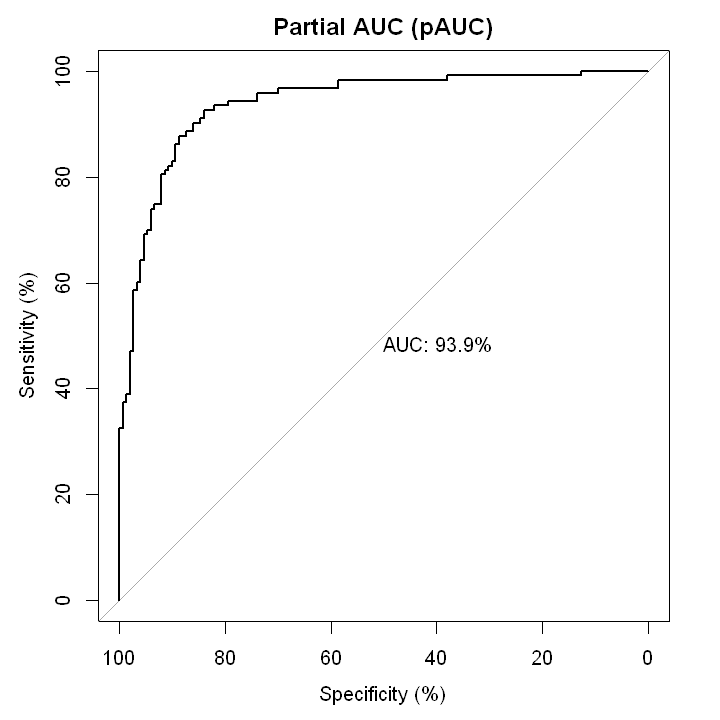

In [795]:
options(repr.plot.width=6, repr.plot.height=6)
plot.roc(train_fit$disease, train_fit$fitted,
         print.auc=TRUE,                    
         percent = TRUE,
         main = "Partial AUC (pAUC)")

Na trénovacích datech vypadá vše v pořádku. Přesnost modelu je cca 88 %, plocha pod AUC křivkou má vysokou hodnotu.

## Test na testovacích datech

Teď můžeme přejít k testování modelu na testovacích datech a zjistit, jestli náš model není přefitovaný a dobře predikuje. Je třeba zmínit, že zatímco trénovacích dat jsme měli 273, testovacích vzorků je pouze 30, což je pouze zhruba 10% vzorek oproti velikosti trénovacích dat.

Použijeme threshold získaný na trénovacích datech.

In [796]:
test <- data_test
for (i in c(2,3,6,7,9,11,13,14)) {
    test[,i] <- as.factor(test[,i])
}
levels(test$sex) <- c("male", "female")
#summary(test)

test_fit <- test %>%
  mutate(fitted = predict(mod_step, newdata = test, type = "response"),
         predict = as.factor(ifelse(fitted > thr, "1", "0")) )

CM_test <- caret::confusionMatrix(test_fit$predict, test_fit$disease, positive="1")
CM_test

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 11  5
         1  3 11
                                          
               Accuracy : 0.7333          
                 95% CI : (0.5411, 0.8772)
    No Information Rate : 0.5333          
    P-Value [Acc > NIR] : 0.02046         
                                          
                  Kappa : 0.469           
                                          
 Mcnemar's Test P-Value : 0.72367         
                                          
            Sensitivity : 0.6875          
            Specificity : 0.7857          
         Pos Pred Value : 0.7857          
         Neg Pred Value : 0.6875          
             Prevalence : 0.5333          
         Detection Rate : 0.3667          
   Detection Prevalence : 0.4667          
      Balanced Accuracy : 0.7366          
                                          
       'Positive' Class : 1               
                                    

Jak můžeme vidět, výsledky jsou oproti trénovacím datům mnohem horší. Přesnost nám klesla o deset procent, klesly i zbylé statistiky. V této úloze nás obzvlášť zajímá sensitivita, která určuje, kolik jsme dokázali zachytit pozitivních případů ze všech možných pozitivních případů. Ve zdravotnictví nás velmi často zajímá spíše přesnost zachycení nemoci, protože falešně negativní test může mít mnohem horší následky než test falešně pozitivní. Bohužel právě sensitivita na testovacích datech výrazně klesla.

In [64]:
#install.packages("pROC")
library(pROC)

Vykresleme si ještě ROC křivku a podívejme se na hodnotu AUC. Výsledné hodnoty jsou na testovacích datech nižší než na trénovacích. Tento výsledek je očekávaný, nicméně jistě by bylo lepší, kdyby se hodnota na testovacích datech více blížila těm na datech testovacích.

Setting levels: control = 0, case = 1

Setting direction: controls < cases



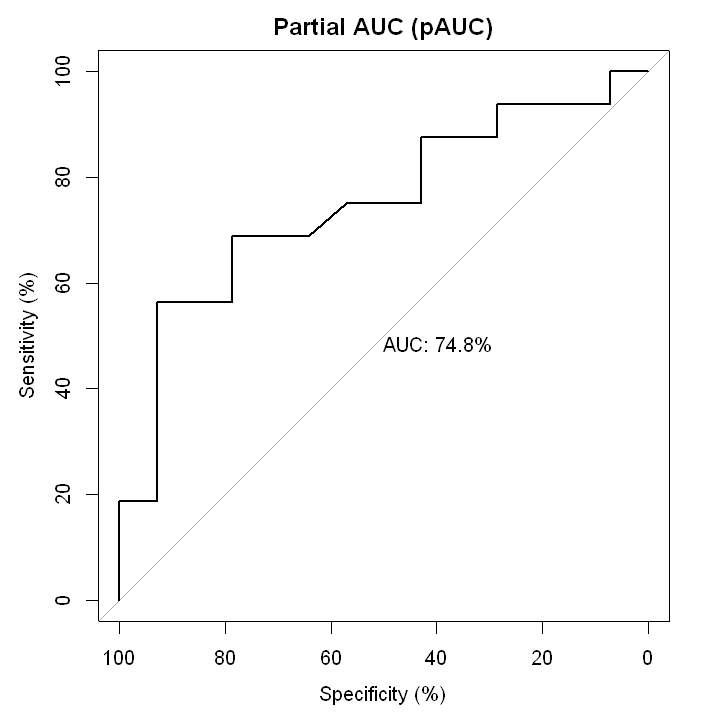

In [797]:
plot.roc(test_fit$disease, test_fit$fitted,          # data
         percent = TRUE,                    # show all values in percent
         #partial.auc=c(100, 90), 
         #partial.auc.correct=True,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         #print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         #print.auc.col = "#1c61b6",
         #auc.polygon = TRUE, 
         #auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         #max.auc.polygon = TRUE, 
         #max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")

### Pravděpodobnost onemocnění podle `blood_pressure`

Posledním úkolem v této podotázce je zjistit pravděpodobnost onemocnění pro testovací data a vykreslení predikčních intervalů pro proměnnou `blood_pressure`. Sestavíme nejdříve model pro závislost onemocnění na krevním tlaku.

In [798]:
mod_pressure <- glm(disease ~ blood_pressure, family = binomial, train)
summary(mod_pressure)


Call:
glm(formula = disease ~ blood_pressure, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5049  -1.0807  -0.9125   1.2434   1.5381  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -2.76766    0.97006  -2.853  0.00433 **
blood_pressure  0.01951    0.00730   2.672  0.00754 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 375.78  on 272  degrees of freedom
Residual deviance: 368.37  on 271  degrees of freedom
AIC: 372.37

Number of Fisher Scoring iterations: 4


Podíváme se na grafické zobrazení konfidenčních intervalů společně s testovacími daty. Níže můžeme vidět dva grafy, na prvním je použit kvantil normálního rozdělení, na druhém pak kvantil spočítaný z modelu pro krevní tlak. M"žeme vidět, že v testovacích datech nemá tlak téměř vliv na onemocnění, nevidíme žádný trend, klasifikace onemocnění podle krevního tlaku by byla velmi nepřesná. Konfidenční intervaly to potvrzují.

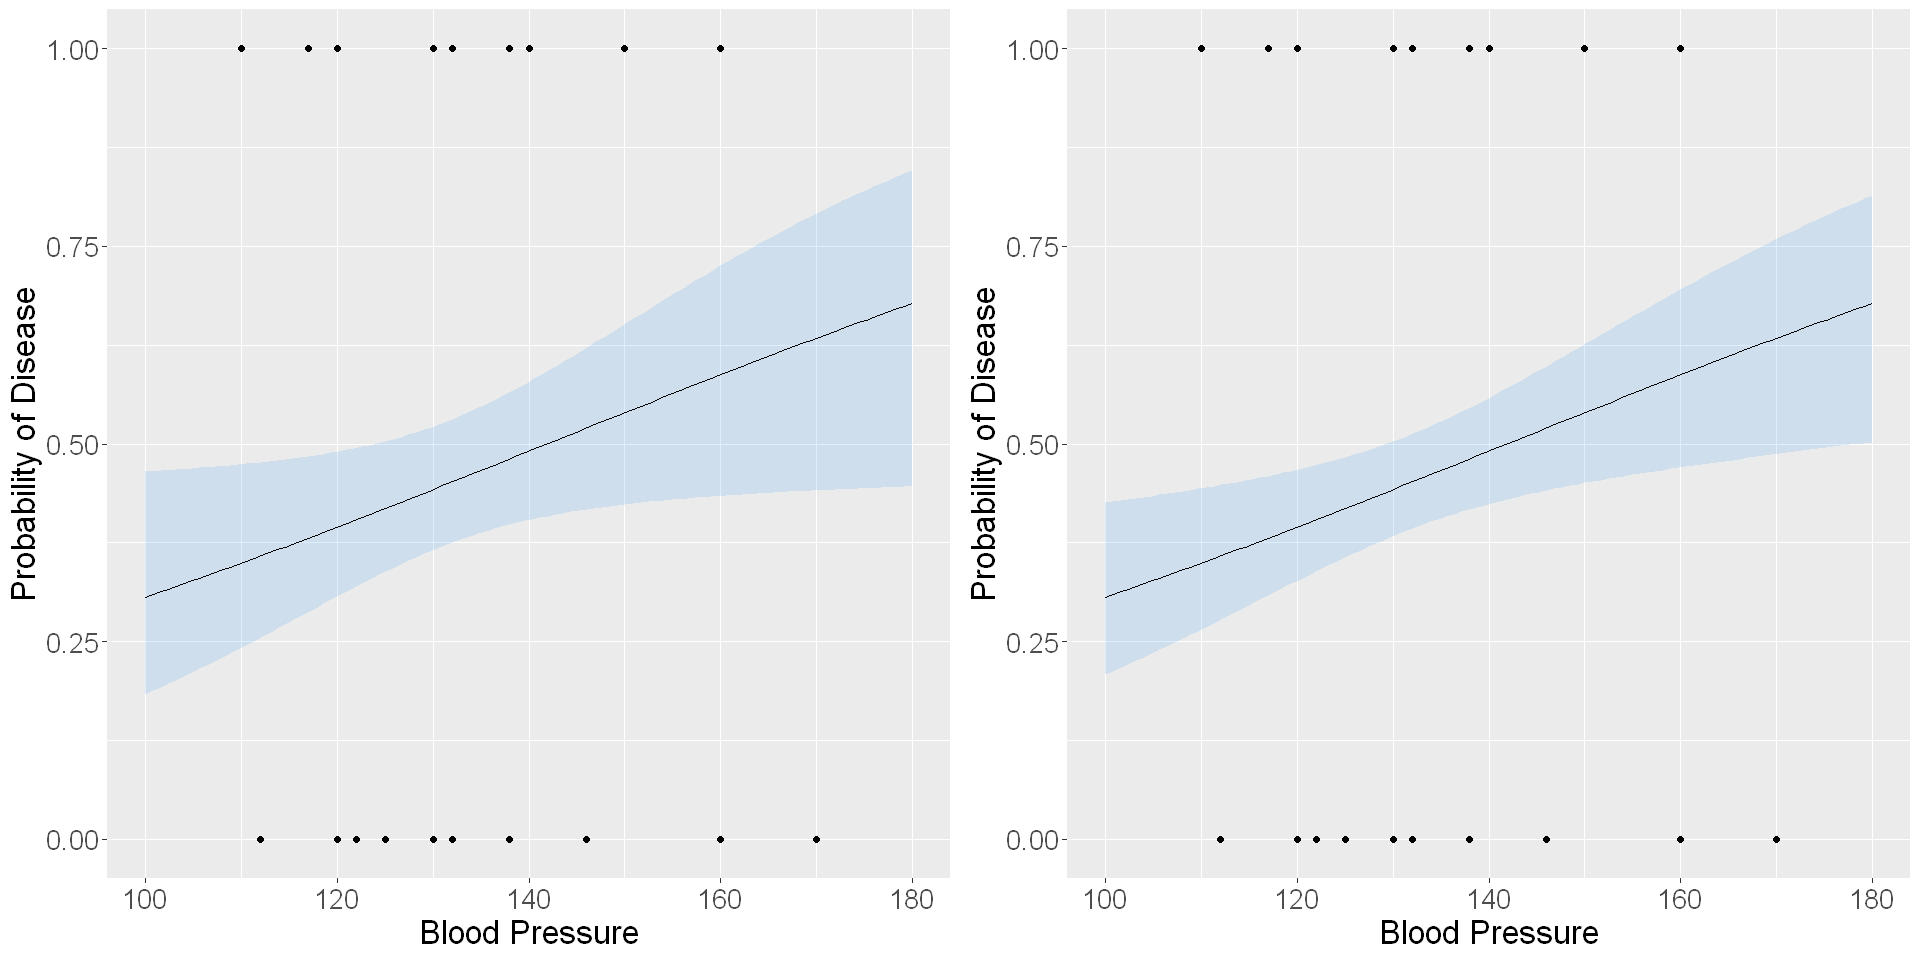

In [802]:
ilink <- family(mod_pressure)$linkinv

quant_t <- qt(0.025, df = df.residual(mod_pressure), lower.tail = FALSE)
quant_n <- qnorm(0.005, lower.tail = FALSE)

tlak_seq <- with(train, data.frame(blood_pressure = seq(min(blood_pressure), max(blood_pressure), length = 100)))
new_data <- cbind(tlak_seq, predict(mod_pressure, tlak_seq, type = "link", se.fit = TRUE))
new_data <- transform(new_data,
                      fitted = ilink(fit),
                      upper = ilink(fit + (quant_n * se.fit)),
                      lower = ilink(fit - (quant_n * se.fit)))


options(repr.plot.width=16, repr.plot.height=8)

cip1 <- ggplot(test, aes(x = blood_pressure, y = as.numeric(as.character(disease)))) +
    geom_ribbon(data = new_data, aes(ymin = lower, ymax = upper, x = blood_pressure),
                fill = "steelblue2", alpha = 0.2, inherit.aes = FALSE) +
    geom_line(data = new_data, aes(y = fitted, x = blood_pressure)) +
    geom_point() + 
    theme(text = element_text(size=20)) + 
    labs(x = "Blood Pressure", y = "Probability of Disease")

new_data <- transform(new_data,
                      fitted = ilink(fit),
                      upper = ilink(fit + (quant_t * se.fit)),
                      lower = ilink(fit - (quant_t * se.fit)))

cip2 <- ggplot(test, aes(x = blood_pressure, y = as.numeric(as.character(disease)))) +
    geom_ribbon(data = new_data, aes(ymin = lower, ymax = upper, x = blood_pressure),
                fill = "steelblue2", alpha = 0.2, inherit.aes = FALSE) +
    geom_line(data = new_data, aes(y = fitted, x = blood_pressure)) +
    geom_point() + 
    theme(text = element_text(size=20)) + 
    labs(x = "Blood Pressure", y = "Probability of Disease")

ggarrange(cip1,cip2,ncol=2,nrow=1)

Spočítáme ještě predikční intervaly pro nejnižší a nejvyšší hodnotu tlaku. Můžeme vidět, že predikční intervaly jsou velmi široké a pravděděpodobnosti onemocnění jsou pořád blízko 50% hranici, což vypovídá o nízké hodnotě informace obsažené v proměnné `blood_pressure`.

In [803]:
db <- with(new_data, matrix(dbinom(x = rep(c(0,1), each = 2), size = 1,
                             prob = fitted[c(1, 100)]),
                      ncol = 2))
colnames(db) <- c("no disease", "disease")
rownames(db) <- with(new_data, paste("Blood Pressure =", range(blood_pressure)))
round(db, 4)

,no disease,disease
Blood Pressure = 100,0.6936,0.3064
Blood Pressure = 180,0.3223,0.6777


## Predikce pro náhodně generované hodnoty, predikční intervaly pro testovací data atd.

Pro `mod_thin` máme jen 6 proměnných. Ty můžeme generovat náhodně a vytvořit celý náhodný dataset, ze kterého pak můžeme vytvářet predikce.

- sexmale
- chest_pain_type1
- chest_pain_type2
- chest_pain_type3
- blood_pressure
- heart_rate
- st_depression
- num_vessels

In [ ]:
#thal, st_slope


In [500]:
levels(train$st_slope)
levels(train$thal)

[1] "0" "1" "2"

[1] "0" "1" "2" "3"

In [506]:
N = 10000
sex <- rbinom(N, size = 1, prob = 0.5)
chest_pain_type <- rbinom(N, size = 3, prob = 0.5)
blood_pressure <- sample(100:180, N, replace = TRUE)
heart_rate <- sample(71:202, N, replace = TRUE)
st_depression <- round(runif(N, min = 0, max = 6.2),1)
num_vessels <- sample(0:4, N, replace = TRUE)
st_slope <- sample(0:2, N, replace = TRUE)
thal <- sample(0:3, N, replace = TRUE)

new_rand <- as.data.frame(cbind(sex, chest_pain_type, blood_pressure, heart_rate, st_depression, num_vessels, st_slope, thal))
#head(new_rand)

new_rand$sex <- as.factor(new_rand$sex)
levels(new_rand$sex) <- c("female", "male")
new_rand$chest_pain_type <- as.factor(new_rand$chest_pain_type)
new_rand$st_slope <- as.factor(new_rand$st_slope)
new_rand$thal <- as.factor(new_rand$thal)

summary(new_rand)
summary(train)

     sex       chest_pain_type blood_pressure    heart_rate    st_depression  
 female:4960   0:1252          Min.   :100.0   Min.   : 71.0   Min.   :0.000  
 male  :5040   1:3758          1st Qu.:120.0   1st Qu.:104.0   1st Qu.:1.600  
               2:3741          Median :140.0   Median :136.0   Median :3.100  
               3:1249          Mean   :140.3   Mean   :136.7   Mean   :3.093  
                               3rd Qu.:160.0   3rd Qu.:169.0   3rd Qu.:4.600  
                               Max.   :180.0   Max.   :202.0   Max.   :6.200  
  num_vessels    st_slope thal    
 Min.   :0.000   0:3372   0:2480  
 1st Qu.:1.000   1:3295   1:2606  
 Median :2.000   2:3333   2:2497  
 Mean   :2.009            3:2417  
 3rd Qu.:3.000                    
 Max.   :4.000                    

      age            sex      chest_pain_type blood_pressure   cholesterol   
 Min.   :31.00   female: 90   0:130           Min.   :100.0   Min.   :126.0  
 1st Qu.:48.00   male  :183   1: 42           1st Qu.:120.0   1st Qu.:212.0  
 Median :55.00                2: 79           Median :130.0   Median :243.0  
 Mean   :54.32                3: 22           Mean   :131.5   Mean   :248.1  
 3rd Qu.:61.00                                3rd Qu.:140.0   3rd Qu.:275.0  
 Max.   :75.00                                Max.   :180.0   Max.   :564.0  
 blood_sugar rest_ecg   heart_rate    ex_angina st_depression   st_slope
 0:231       0:131    Min.   : 71.0   0:183     Min.   :0.000   0: 17   
 1: 42       1:138    1st Qu.:134.0   1: 90     1st Qu.:0.000   1:125   
             2:  4    Median :152.0             Median :0.800   2:131   
                      Mean   :149.6             Mean   :1.028           
                      3rd Qu.:166.0             3rd Qu.:1.600           
                

In [507]:
length(rand_prediction <- predict(mod_step, new_rand, type = "response"))
new_rand2 <- new_rand
new_rand2$fitted <- rand_prediction

[1] 10000

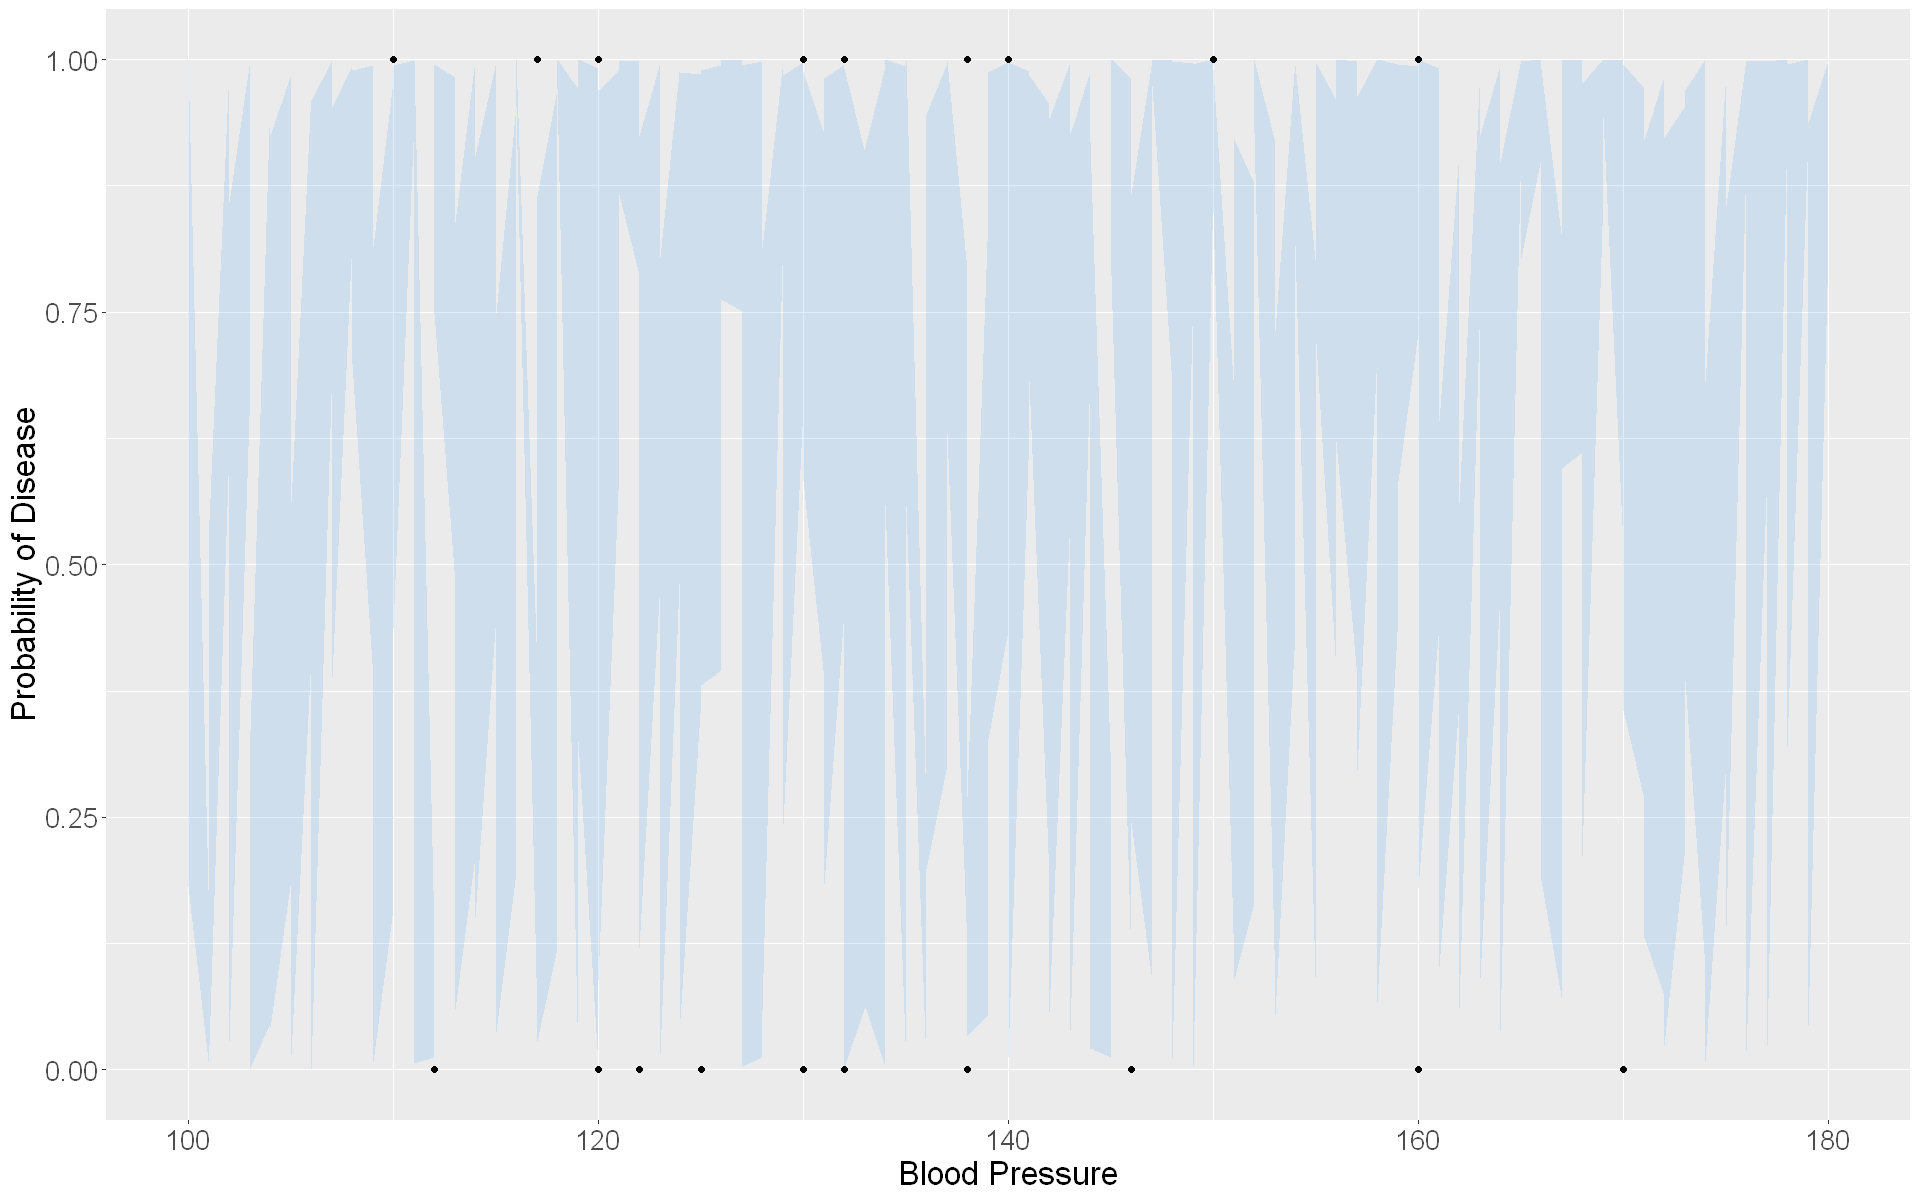

In [519]:
ilink <- family(mod_step)$linkinv

quant_t <- qt(0.025, df = df.residual(mod_step), lower.tail = FALSE)
quant_n <- qnorm(0.005, lower.tail = FALSE)

new_data <- predict(mod_step, new_rand, type = "link", se.fit = TRUE)
new_data <- transform(new_data,
                      fitted = ilink(fit),
                      upper = ilink(fit + (quant_t * se.fit)),
                      lower = ilink(fit - (quant_t * se.fit)))

options(repr.plot.width=16, repr.plot.height=10)
ggplot(test, aes(x = blood_pressure, y = as.numeric(as.character(disease)))) +
    geom_ribbon(data = new_data, aes(ymin = lower, ymax = upper, x = blood_pressure),
                fill = "steelblue2", alpha = 0.2, inherit.aes = FALSE) +
    #geom_line(data = new_data, aes(y = fitted, x = blood_pressure)) +
    geom_point() +
    theme(text = element_text(size=20)) + 
    labs(x = "Blood Pressure", y = "Probability of Disease")

# 03 - Poissonovská regrese

## Příprava dat

Pro Poissonovskou regresi použijeme `data_table`. Tabulku musíme nejdříve upravit.

In [836]:
log_data <- pivot_longer(data_table, cols = c("disease_yes", "disease_no"),
                         names_to = "disease")[,c("age", "blood_pressure", "disease", "value")]

log_data$disease <- as.factor(log_data$disease)
levels(log_data$disease) <- c("0", "1")
names(log_data)<- c("age", "blood_pressure", "disease", "count")
log_data

age,blood_pressure,disease,count
<fct>,<fct>,<fct>,<int>
30-45,100-120,1,7
30-45,100-120,0,19
30-45,121-130,1,1
30-45,121-130,0,10
30-45,131-140,1,3
30-45,131-140,0,6
30-45,140-180,1,1
30-45,140-180,0,2
45-60,100-120,1,15


Můžeme se také podívat na přehlednější tabulku. Původní proměnnou $n$ jsme z tabulky vyřadili, jedná se totiž pro případ tabulky níže, o součty počtů `count` pro danou kombinaci věku, krevního tlaku a onemocnění.

In [837]:
log_data %>%
    pivot_wider(values_from = count, names_from = blood_pressure)

age,disease,100-120,121-130,131-140,140-180
<fct>,<fct>,<int>,<int>,<int>,<int>
30-45,1,7,1,3,1
30-45,0,19,10,6,2
45-60,1,15,22,14,21
45-60,0,29,20,21,12
60-75,1,9,8,8,14
60-75,0,9,5,7,10


Získáváme tak data, která odpovídají trojrozměrné kontingenční tabulce, kde vysvětlující proměnné jsou věk, krevní tlak a přítomnost nemoci, vysvětlovaná proměnná je počet v těchto kategoriích.

Už z této tabulky by se dala spočítat pravděpodobnost onemocnění pro celou populaci. Tato pravděpodobnost vychází zhruba 45 %. Spočítat můžeme i poměr šancí na onemocnění, který je 82 %. Hodnoty jsou stejné jako výše v binomickém modelu.

In [838]:
pocet_onemocneni <- sum(log_data[which(log_data$disease == 1),]$count)
pocet_zdravych <- sum(log_data[which(log_data$disease == 0),]$count)
celkem <- sum(log_data$count)
print("Pravděpodobnost onemocnění:")
pocet_onemocneni / celkem
print("Poměr šancí pro onemocnění:")
(pocet_onemocneni / celkem) / (pocet_zdravych / celkem)

[1] "Pravděpodobnost onemocnění:"


[1] 0.4505495

[1] "Poměr šancí pro onemocnění:"


[1] 0.82

Na proměnné se můžeme podívat také graficky.

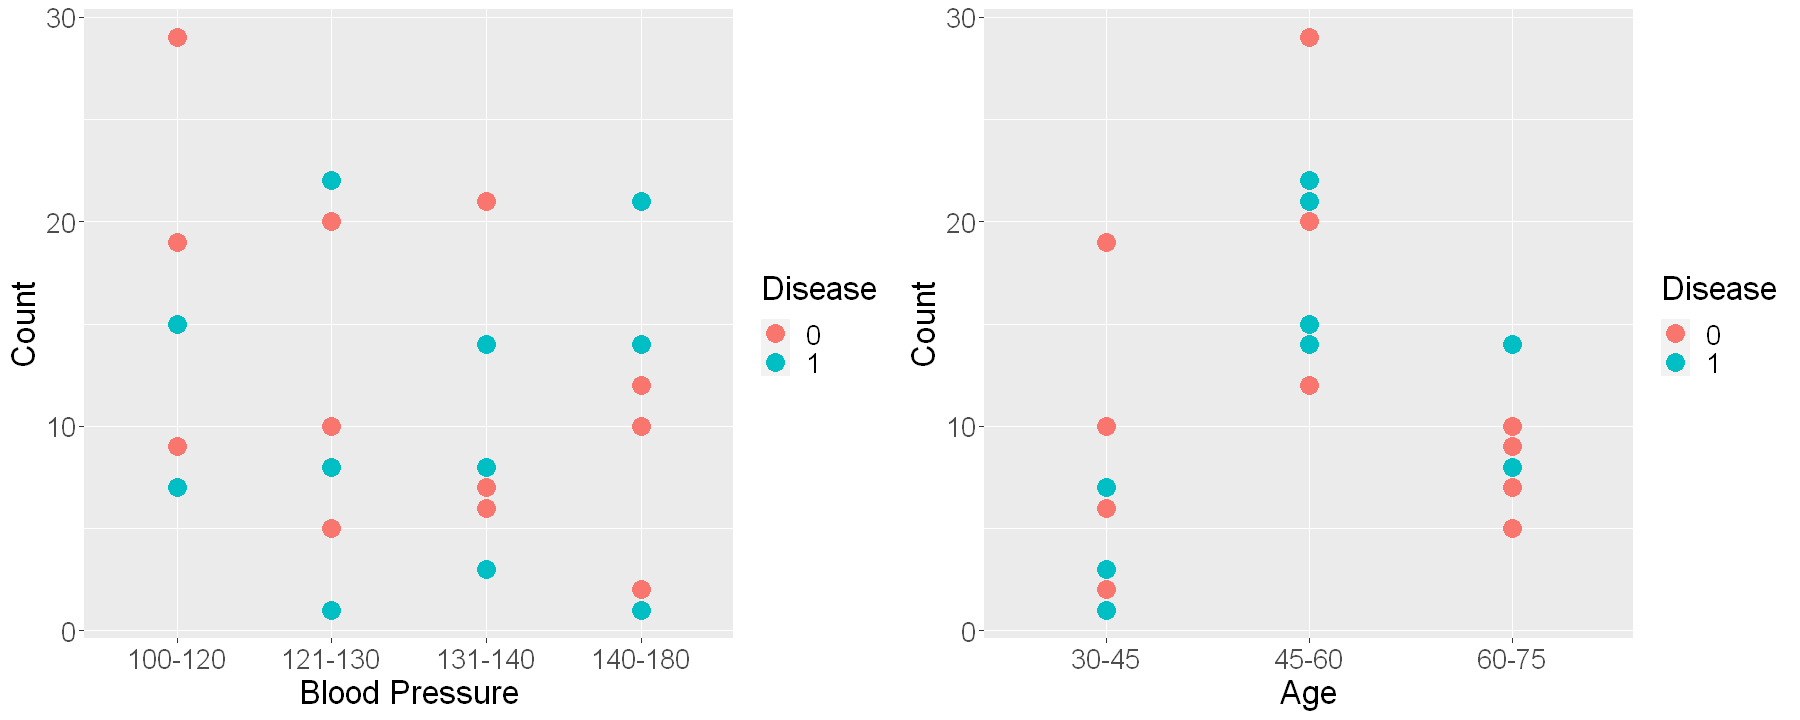

In [839]:
gg1 <- ggplot(log_data, aes(x = blood_pressure, y = count, color=disease)) +
    geom_point(size=5) +
    labs(x = "Blood Pressure", y = "Count", color="Disease") +
    theme(text = element_text(size=20))

gg2 <- ggplot(log_data, aes(x = age, y = count, color=disease)) +
    geom_point(size=5) +
    labs(x = "Age", y = "Count", color="Disease") +
    theme(text = element_text(size=20))

options(repr.plot.width=15, repr.plot.height=6)
ggarrange(gg1,gg2,ncol=2,nrow=1)

## Aditivní model

Nejdříve sestavíme aditivní model.

In [840]:
log_add <- glm(count ~ ., family = poisson, data = log_data)
summary(log_add)


Call:
glm(formula = count ~ ., family = poisson, data = log_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.30762  -1.14800  -0.07252   0.54263   3.02216  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)             2.1608     0.1764  12.251  < 2e-16 ***
age45-60                1.1451     0.1640   6.982 2.91e-12 ***
age60-75                0.3567     0.1863   1.915   0.0555 .  
blood_pressure121-130  -0.2877     0.1628  -1.767   0.0773 .  
blood_pressure131-140  -0.3998     0.1683  -2.376   0.0175 *  
blood_pressure140-180  -0.3830     0.1674  -2.288   0.0222 *  
disease1               -0.1985     0.1216  -1.631   0.1028    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 119.070  on 23  degrees of freedom
Residual deviance:  44.094  on 17  degrees of freedom
AIC: 154.18

Number of Fisher Scoring iterations: 5


Z modelu se zdá, že proměnné věk a krevní tlak jsou významné, nicméně proměnná `disease` není významná ani na hladině $\alpha = 0.1$.

Níže můžeme vidět grafické porovnání naměřených (modré) a predikovaných (červené) hodnot počtů. Čistě podle vizuální stránky by se dalo říct, že model nepredikuje špatně, nicméně ani extrémně dobře.

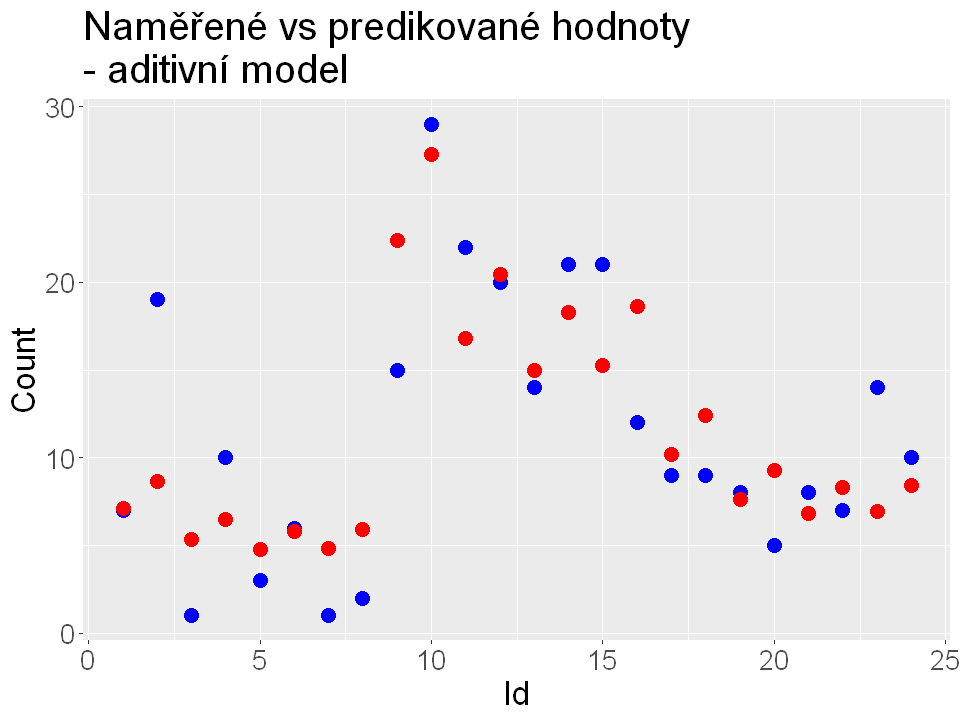

In [841]:
options(repr.plot.width=8, repr.plot.height=6)
log_data_plot  <- log_data
log_data_plot$fitted <- fitted(log_add)
loglinp1 <- ggplot(log_data_plot, aes(x = 1:length(count), y = count)) +
    geom_point(color = "blue", size = 4) +
    geom_point(aes(x = 1:length(count), y = fitted), color = "red", size = 4) +
    theme(text = element_text(size = 20)) +
    labs(x = "Id", y = "Count", title = "Naměřené vs predikované hodnoty\n- aditivní model")
loglinp1

In [842]:
exp(coef(log_add))

(Intercept)              age45-60              age60-75 
            8.6785010             3.1428571             1.4285714 
blood_pressure121-130 blood_pressure131-140 blood_pressure140-180 
            0.7500000             0.6704545             0.6818182 
             disease1 
            0.8200000

In [843]:
exp(coef(log_add)[7])/(1+exp(coef(log_add)[7]))

disease1 
0.4505495

Podle koeficientů v modelu bychom mohli říct, že při započtení vlivu všech proměnných je šance na onemocnění ve zkoumané populaci 82 %. Odhad pravděpodobnosti pro srdeční onemocnění je pak 45 % (můžeme si všimnout, že se opravdu jedná o stejné hodnoty jako při výpočtu přímo z trojrozměrné kontingenční tabulky).

## Model s dvojnými interakcemi

Přidáme interakce druhého řádu mezi proměnnými a prozkoumáme výsledný model.

In [844]:
log_2int<- glm(count ~ age * blood_pressure + age * disease + blood_pressure * disease, family = poisson, data = log_data)
summary(log_2int)


Call:
glm(formula = count ~ age * blood_pressure + age * disease + 
    blood_pressure * disease, family = poisson, data = log_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.42259  -0.31640  -0.01367   0.34586   0.74088  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      3.0192     0.2108  14.322  < 2e-16 ***
age45-60                         0.2718     0.2693   1.009 0.312889    
age60-75                        -0.7519     0.3411  -2.204 0.027509 *  
blood_pressure121-130           -0.9605     0.3713  -2.587 0.009681 ** 
blood_pressure131-140           -1.1023     0.3956  -2.786 0.005333 ** 
blood_pressure140-180           -2.3837     0.6235  -3.823 0.000132 ***
disease1                        -1.3101     0.3640  -3.599 0.000320 ***
age45-60:blood_pressure121-130   0.7373     0.4250   1.735 0.082779 .  
age60-75:blood_pressure121-130   0.4279     0.5206   0.822 0.411074    
age45-6

Můžeme si všimnout, že se nám výrazně snížila deviace modelu, částečně i AIC statistika, nový model by měl tedy lépe popisovat data než model pouze aditivní. Pokud vůči sobě otestujeme příslušné modely, zjistíme, že model s interakcemi je statisticky lepší než aditivní model.

In [845]:
anova(log_add, log_2int, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,44.093881,NA,NA,NA
2,6,5.425143,11,38.66874,6.029569e-05


Můžeme se opět podívat na grafické znázornění dat a rozdílů mezi originálními a predikovanými hodnotami. Rozdíly se zmenšují, nafitované hodnoty jsou blíže hodnotám naměřeným.

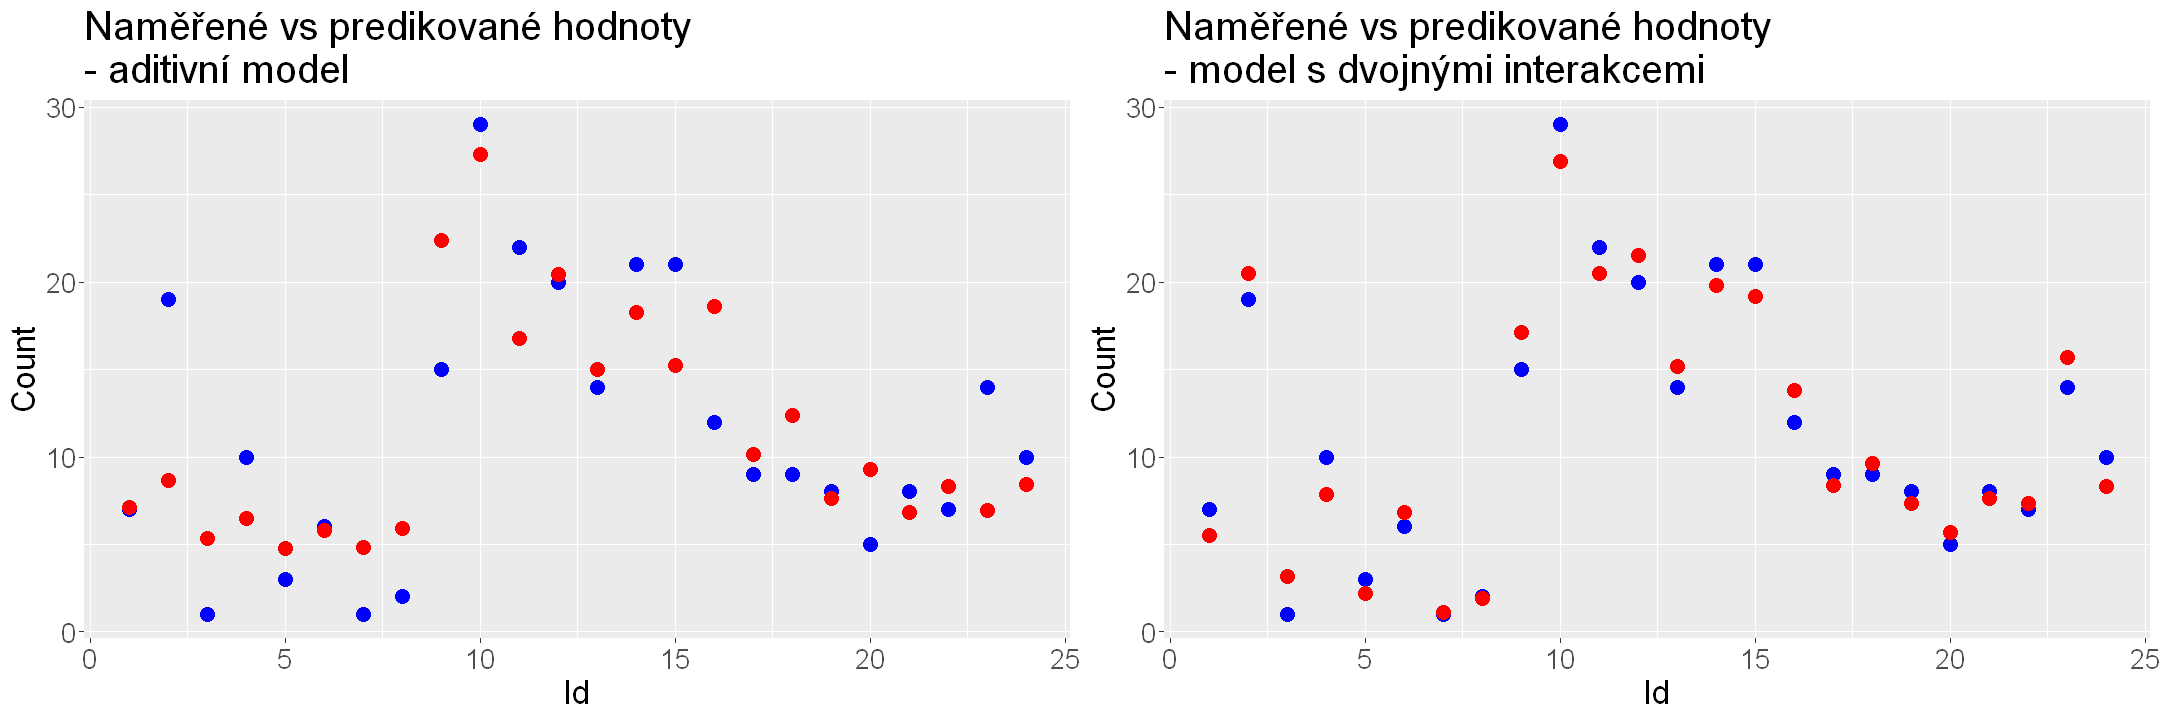

In [846]:
options(repr.plot.width=18, repr.plot.height=6)

log_data_plot$fitted_2int <- fitted(log_2int)
loglinp2 <- ggplot(log_data_plot, aes(x = 1:length(count), y = count)) +
    geom_point(color = "blue", size = 4) +
    geom_point(aes(x = 1:length(count), y = fitted_2int), color = "red", size = 4) +
    theme(text = element_text(size = 20)) +
    labs(x = "Id", y = "Count", title = "Naměřené vs predikované hodnoty\n- model s dvojnými interakcemi")

ggarrange(loglinp1, loglinp2, nrow = 1, ncol = 2)

In [847]:
exp(coef(log_2int))

(Intercept)                       age45-60 
                   20.47565689                     1.31230228 
                      age60-75          blood_pressure121-130 
                    0.47149119                     0.38271812 
         blood_pressure131-140          blood_pressure140-180 
                    0.33209464                     0.09221108 
                      disease1 age45-60:blood_pressure121-130 
                    0.26980053                     2.09024578 
age60-75:blood_pressure121-130 age45-60:blood_pressure131-140 
                    1.53406791                     2.22284042 
age60-75:blood_pressure131-140 age45-60:blood_pressure140-180 
                    2.29711056                     5.56911081 
age60-75:blood_pressure140-180              age45-60:disease1 
                    9.33835730                     2.36285170 
             age60-75:disease1 blood_pressure121-130:disease1 
                    3.20419822                     1.49630881 
blood_pressure131-140:disease1 blood_pressure140-180:disease1 
                    1.19924693                     2.18277462

In [848]:
cef <- coef(log_2int)
exp(cef["age45-60"])
exp(cef["age60-75"])
a <- exp(cef["age45-60"] +
    cef["age45-60:blood_pressure121-130"] + 
    cef["age45-60:blood_pressure131-140"] +
    cef["age45-60:blood_pressure140-180"] +
    cef["age45-60:disease1"])

b <- exp(cef["age60-75"] +
    cef["age60-75:blood_pressure121-130"] + 
    cef["age60-75:blood_pressure131-140"] +
    cef["age60-75:blood_pressure140-180"] +
    cef["age60-75:disease1"])

b / a

exp(cef["age60-75"] - cef["age45-60"])
exp(cef["age60-75:disease1"] - cef["age45-60:disease1"])

age45-60 
1.312302

age60-75 
0.4714912

age60-75 
0.6196238

age60-75 
0.3592855

age60-75:disease1 
         1.356073

## Saturovaný model

Saturovaný model je model, který uvažuje všechny proměnné i všechny interakce, oproti předchozímu modelu tak přibyde interakce třetího řádu mezi všemi vysvětlujícími proměnnými (respektive mezi všemi kombinacemi vysvětlujících proměnných).

In [849]:
log_sat<- glm(count ~ age * blood_pressure * disease, family = poisson, data = log_data)
summary(log_sat)


Call:
glm(formula = count ~ age * blood_pressure * disease, family = poisson, 
    data = log_data)

Deviance Residuals: 
 [1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              2.94444    0.22942  12.835  < 2e-16
age45-60                                 0.42286    0.29515   1.433  0.15195
age60-75                                -0.74721    0.40465  -1.847  0.06481
blood_pressure121-130                   -0.64185    0.39068  -1.643  0.10040
blood_pressure131-140                   -1.15268    0.46829  -2.461  0.01384
blood_pressure140-180                   -2.25129    0.74339  -3.028  0.00246
disease1                                -0.99853    0.44214  -2.258  0.02392
age45-60:blood_pressure121-130           0.27029    0.48694   0.555  0.57884
age60-75:blood_pressure121-130           0.05407    0.68099   0.079  0.93672
age45-60:blood_

In [850]:
exp(coef(log_sat))

(Intercept)                                age45-60 
                             19.0000000                               1.5263158 
                               age60-75                   blood_pressure121-130 
                              0.4736842                               0.5263158 
                  blood_pressure131-140                   blood_pressure140-180 
                              0.3157895                               0.1052632 
                               disease1          age45-60:blood_pressure121-130 
                              0.3684211                               1.3103448 
         age60-75:blood_pressure121-130          age45-60:blood_pressure131-140 
                              1.0555556                               2.2931034 
         age60-75:blood_pressure131-140          age45-60:blood_pressure140-180 
                              2.4629630                               3.9310345 
         age60-75:blood_pressure140-180                       age45-60:disease1 
                             10.5555556                               1.4039409 
                      age60-75:disease1          blood_pressure121-130:disease1 
                              2.7142857                               0.2714286 
         blood_pressure131-140:disease1          blood_pressure140-180:disease1 
                              1.3571429                               1.3571429 
age45-60:blood_pressure121-130:disease1 age60-75:blood_pressure121-130:disease1 
                              7.8350877                               5.8947368 
age45-60:blood_pressure131-140:disease1 age60-75:blood_pressure131-140:disease1 
                              0.9497076                               0.8421053 
age45-60:blood_pressure140-180:disease1 age60-75:blood_pressure140-180:disease1 
                              2.4929825                               1.0315789

Otestujeme-li saturovaný model oproti modelu s dvojnými interakcemi, zjistíme, že základě $\chi^2$ testu není saturovaný model výrazně lepší, je tedy výhodnější ponechat model s dvojnými interakcemi. Takový závěr je vyhovující, protože saturovaný model zde nemá žádnou výpovědní hodnotu, protože každé měření predikuje přesně.

In [851]:
anova(log_sat, log_2int, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-4.218852e-15,NA,NA,NA
2,6,5.425143e+00,-6,-5.425143,0.49055


Chtěli bychom teď zodpovědět otázku, jestli je na základě saturovaného modelu ve všech věkových skupinách stejná souvislost mezi tlakem a onemocněním srdce.

In [852]:
d <- as.data.frame(exp(coef(log_sat)[8:13]))
d

,exp(coef(log_sat)[8:13])
,<dbl>
age45-60:blood_pressure121-130,1.310345
age60-75:blood_pressure121-130,1.055556
age45-60:blood_pressure131-140,2.293103
age60-75:blood_pressure131-140,2.462963
age45-60:blood_pressure140-180,3.931034
age60-75:blood_pressure140-180,10.555556


Z tabulky je jasně vidět, že jsou rozdíly ve věkových skupinách pro dané hodnoty tlaku. Můžeme zde vidět například výrazný rozdíl pro nejvyšší věkovou skupinu s vysokým tlakem. Oproti referenční skupině (věk 30-45 a srdeční tlak 100-120) mají více než 10x vyšší riziko onemocnění. Obecně vidíme, že se zároveň rostoucím tlakem a věkem roste výrazně riziko srdeční choroby.

Chtěli bychom teď ještě určit rozdíly ve věkových kategoriích pro osoby z nízkám tlakem (< 120) a vysokým tlakem (> 140). Podíváme se zpátky na kontingenční tabulku, ze které můžeme spočítat, jaká je pravděpodobnost onemocnění pro danou věkovou kategorii a daný tlak.

In [862]:
c_table <- log_data %>%
    pivot_wider(values_from = count, names_from = blood_pressure)
c_table$n <- c(12, 37, 72, 82, 39, 31)
c_table

age,disease,100-120,121-130,131-140,140-180,n
<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
30-45,1,7,1,3,1,12
30-45,0,19,10,6,2,37
45-60,1,15,22,14,21,72
45-60,0,29,20,21,12,82
60-75,1,9,8,8,14,39
60-75,0,9,5,7,10,31


In [901]:
nula <- matrix(0, ncol = 2, nrow = 3)
nula <- as.data.frame(nula)
names(nula) <- c("nízký tlak (< 120)", "vysoký tlak (> 140)")
rownames(nula) <- c("30-45", "45-60", "60-75")

In [902]:
for (row in c(1:3)) {
    s <- c_table[2*row-1, 3] + c_table[2*row, 3]
    p <- c_table[2*row-1, 3] / s
    nula[row, 1] = p
    
    s <- c_table[2*row-1, "n"] + c_table[2*row, "n"]
    p <- c_table[2*row-1, "n"] / s
    nula[row, 2] = p
}

rownames(nula) <- c("30-45", "45-60", "60-75")
nula$OR <- nula[,2] / nula[,1]
nula

,nízký tlak (< 120),vysoký tlak (> 140),OR
,<dbl>,<dbl>,<dbl>
30-45,0.2692308,0.2448980,0.909621
45-60,0.3409091,0.4675325,1.371429
60-75,0.5000000,0.5571429,1.114286


Z tabulky můžeme vidět, že největší rozdíl mezi pravděpodobností onemocnění pro nízký a vysoký tlak je ve věkové kategorii 45-60 let. V této kategorii mají lidé s vysokým tlakem o 37 % vyšší riziko onemocnění než lidé s nízkým tlakem. Ve zbylých dvou kategoriích jsou šance podle tlaku víceméně podobné.

# 05 - Machine Learning logistická regrese

**Poznámka:** *Většina kódu je převzatá z dokumentace balíku `tidymodels`, konkrétně z příkladu https://www.tidymodels.org/start/case-study/.*

K dispozici máme dva datasety: `train` a `test`. Budeme chtít použít i nějaká validační data, ideálně pro nalezení nejlepších parametrů chceme použít různé train/validation splity, abychom vždy trénovali a validovali na jiných datech, tedy zajistili co největší robustnost modelu.

Co tedy potřebujeme, je připravit validační split a příslušné `recipe`'s, abychom mohli data normalizovat, převést na one-hot encoding atd.

Trénovací i testovací data máme, vytvoříme tedy validační split:

In [903]:
#splits <- initial_split(train, strata = disease, prop = 0.8)
#td <- training(splits)
#vd <- testing(splits)

val_set <- validation_split(train, 
                            strata = disease, 
                            prop = 0.80)

Definujeme model logistické regrese pro Elastic-Net s tím, že ideální nastavení parametru $\alpha$ budeme hledat později.

In [904]:
ml_mod <- 
  logistic_reg(penalty = tune(), mixture = 1) %>% 
  set_engine("glmnet")

V modelech strojového učení je nevýhodné mít proměnné v různých rozmezích hodnot. Proto numerické proměnné normalizujeme, aby pocházely zhruba z rozdělení $\mathcal{N}(0,1)$. Také nesmíme zapomenout převést faktorové proměnné do one-hot encodingu.

In [905]:
impute_recipe <- recipe(disease ~ ., data = train) %>%
    step_normalize(all_numeric(), -all_outcomes()) %>% 
    step_dummy(all_nominal(), -all_outcomes())

Zkontrolujeme, jak vypadají naše data, když na ně pustíme vytvořený preprocessing. Vidíme, že numerické proměnné jsou normalizované, pro faktorové proměnné byl vytvořen one-hot encoding.

In [906]:
train_prep <- impute_recipe %>%
            prep() %>%
            juice()
summary(train_prep)

      age           blood_pressure      cholesterol         heart_rate     
 Min.   :-2.61580   Min.   :-1.82401   Min.   :-2.34620   Min.   :-3.3970  
 1st Qu.:-0.70850   1st Qu.:-0.66678   1st Qu.:-0.69312   1st Qu.:-0.6727  
 Median : 0.07685   Median :-0.08817   Median :-0.09724   Median : 0.1057  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.75001   3rd Qu.: 0.49044   3rd Qu.: 0.51787   3rd Qu.: 0.7111  
 Max.   : 2.32072   Max.   : 2.80490   Max.   : 6.07299   Max.   : 2.2678  
 st_depression      num_vessels      disease    sex_male     
 Min.   :-0.8821   Min.   :-0.7180   0:150   Min.   :0.0000  
 1st Qu.:-0.8821   1st Qu.:-0.7180   1:123   1st Qu.:0.0000  
 Median :-0.1955   Median :-0.7180           Median :1.0000  
 Mean   : 0.0000   Mean   : 0.0000           Mean   :0.6703  
 3rd Qu.: 0.4910   3rd Qu.: 0.3029           3rd Qu.:1.0000  
 Max.   : 4.4388   Max.   : 3.3657           Max.   :1.0000  
 chest_pain_type_X1 chest_pain_typ

Dokončíme preprocessing přiřazením rolí pro jednotlivé proměnné a zkontrolujeme, že typy proměnných (numerické vs faktorové) odpovídají a máme správně definované prediktory a vysvětlovanou proměnnou.

In [907]:
ml_recipe <- impute_recipe %>%
    update_role(age, sex, chest_pain_type, blood_pressure,
               cholesterol, blood_sugar, rest_ecg, heart_rate,
               ex_angina, st_depression, st_slope, num_vessels, thal,
               new_role = "predictor") %>%
    update_role(disease, new_role = "outcome")

In [908]:
summary(ml_recipe)

variable,type,role,source
<chr>,<chr>,<chr>,<chr>
age,numeric,predictor,original
sex,nominal,predictor,original
chest_pain_type,nominal,predictor,original
blood_pressure,numeric,predictor,original
cholesterol,numeric,predictor,original
blood_sugar,nominal,predictor,original
rest_ecg,nominal,predictor,original
heart_rate,numeric,predictor,original
ex_angina,nominal,predictor,original


Vše se zdá v pořádku, můžeme tedy vytvořit workflow.

In [909]:
ml_workflow <- 
  workflow() %>% 
  add_recipe(ml_recipe) %>% 
  add_model(ml_mod) 

Pro hledání parametru $\alpha$ vytvoříme grid, kdy následně vybereme nejlepší hodnotu podle výsledku na validačních datech. Parametr $\alpha$ se může pohybovat v intervalu $[0,1]$, vyzkoušíme tedy nejdřív toto rozmezí.

In [910]:
grids <- tibble(penalty = seq(0,1,length.out=50))

Už nezbývá než spustit model a podívat se na výsledky. V aktuální verzi balíku `tidymodels`bohužel není možné kombinovat evaluační metriky jako přesnost a sensitivita, budeme tedy evaluovat na základě ROC-AUC a accuracy.

In [911]:
results <- 
  ml_workflow %>% 
  tune_grid(val_set,
            grid = grids,
            control = control_grid(save_pred = TRUE, verbose = TRUE),
            metrics = metric_set(roc_auc, accuracy))

i validation: preprocessor 1/1

<U+221A> validation: preprocessor 1/1

i validation: preprocessor 1/1, model 1/1

<U+221A> validation: preprocessor 1/1, model 1/1

i validation: preprocessor 1/1, model 1/1 (predictions)



Podíváme se na výsledky. V tabulce můžeme vidět, že pro hodnoty $\alpha > 0.2$ dostáváme už velmi špatné výsledky. Omezíme tedy grid pouze na interval $[0,0.2]$.

In [912]:
collect_metrics(results) %>%
 pivot_wider(names_from = .metric, values_from = mean ) %>%
 arrange(desc(accuracy))

penalty,.estimator,n,std_err,.config,accuracy,roc_auc
<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
0.00000000,binary,1,NA,Preprocessor1_Model01,0.8000000,0.9013333
0.02040816,binary,1,NA,Preprocessor1_Model02,0.7818182,0.8920000
0.04081633,binary,1,NA,Preprocessor1_Model03,0.7818182,0.8986667
0.06122449,binary,1,NA,Preprocessor1_Model04,0.7818182,0.8893333
0.08163265,binary,1,NA,Preprocessor1_Model05,0.7636364,0.8866667
0.16326531,binary,1,NA,Preprocessor1_Model09,0.7454545,0.8720000
0.18367347,binary,1,NA,Preprocessor1_Model10,0.7454545,0.8780000
0.20408163,binary,1,NA,Preprocessor1_Model11,0.7454545,0.8780000
0.22448980,binary,1,NA,Preprocessor1_Model12,0.7454545,0.8426667


In [913]:
grids <- tibble(penalty = seq(0,0.2,length.out=100))

results <- 
  ml_workflow %>% 
  tune_grid(val_set,
            grid = grids,
            control = control_grid(save_pred = TRUE, verbose = TRUE),
            metrics = metric_set(roc_auc, accuracy))

collect_metrics(results) %>%
    pivot_wider(names_from = .metric, values_from = mean ) %>%
    arrange(desc(roc_auc))

i validation: preprocessor 1/1

<U+221A> validation: preprocessor 1/1

i validation: preprocessor 1/1, model 1/1

<U+221A> validation: preprocessor 1/1, model 1/1

i validation: preprocessor 1/1, model 1/1 (predictions)



penalty,.estimator,n,std_err,.config,accuracy,roc_auc
<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
0.000000000,binary,1,NA,Preprocessor1_Model001,0.8000000,0.9013333
0.002020202,binary,1,NA,Preprocessor1_Model002,0.8000000,0.9013333
0.034343434,binary,1,NA,Preprocessor1_Model018,0.7818182,0.9000000
0.004040404,binary,1,NA,Preprocessor1_Model003,0.8000000,0.8986667
0.028282828,binary,1,NA,Preprocessor1_Model015,0.7636364,0.8986667
0.030303030,binary,1,NA,Preprocessor1_Model016,0.7636364,0.8986667
0.032323232,binary,1,NA,Preprocessor1_Model017,0.7636364,0.8986667
0.036363636,binary,1,NA,Preprocessor1_Model019,0.7818182,0.8986667
0.038383838,binary,1,NA,Preprocessor1_Model020,0.7818182,0.8986667


## k-fold crossvalidation

Naše výsledky jsou zatím pouze pro jeden validační split. My však chceme co nejrobustnější výsledky, proto je nutné provést cross-validaci a podívat se na výsledky pro $n$ různých běhů.

In [914]:
train_fold <- vfold_cv(train, strata = "disease", v = 20)
summary(train_fold)
#train_fold

# adding parameters to workflow
ml_fold <- ml_workflow %>%
  tune_grid(
    resamples = train_fold,
    grid = grids,
    metrics = metric_set(roc_auc)
  )
 

 splits.Length  splits.Class  splits.Mode      id           
 4            vfold_split  list           Length:20         
 4            vfold_split  list           Class :character  
 4            vfold_split  list           Mode  :character  
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_split  list                             
 4            vfold_spli

Zde se už můžeme podívat na výsledky. Nejlepší se zdá parametr $\alpha = 0.016$. Zvolíme tedy tento parametr a tento model.

In [915]:
collect_metrics(ml_fold) %>%
 pivot_wider(names_from = .metric, values_from = mean ) %>%
 arrange(desc(roc_auc))

penalty,.estimator,n,std_err,.config,roc_auc
<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>
0.016161616,binary,20,0.01444776,Preprocessor1_Model009,0.9242560
0.018181818,binary,20,0.01444776,Preprocessor1_Model010,0.9242560
0.014141414,binary,20,0.01409186,Preprocessor1_Model008,0.9220238
0.020202020,binary,20,0.01530394,Preprocessor1_Model011,0.9218750
0.012121212,binary,20,0.01380590,Preprocessor1_Model007,0.9209821
0.010101010,binary,20,0.01324040,Preprocessor1_Model006,0.9208333
0.008080808,binary,20,0.01312560,Preprocessor1_Model005,0.9197917
0.022222222,binary,20,0.01606780,Preprocessor1_Model012,0.9193452
0.024242424,binary,20,0.01598286,Preprocessor1_Model013,0.9181548


In [916]:
best_model <- 
  ml_fold %>% 
  collect_metrics() %>% 
  arrange(desc(mean)) %>% 
  slice(1)
best_model

penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0.01616162,roc_auc,binary,0.924256,20,0.01444776,Preprocessor1_Model009


## Výsledky na testovacích datech

Na trénovacích datech jsme natrénovali model, díky výsledkům na validačních datech vybrali nejlepší hyperparametr. Teď je tedy čas na evaluaci výsledků na testovacích datech, tedy datech, se kterými se model ještě nesetkal.

Bohužel se mi nepodařilo zjistit, jak použít původní `train_data` dataset na natrénování a původní `test_data` dataset jako testovací. Proto jsem spojila oba datasety do datasetu `data_all`, který je pak rozdělen na trénovací a testovací data pomocí funkce `initial_split`.

In [917]:
data_all <- rbind(train, test)
dim(data_all)
summary(data_all)

[1] 303  14

      age            sex      chest_pain_type blood_pressure   cholesterol   
 Min.   :31.00   female:114   0:143           Min.   :100.0   Min.   :126.0  
 1st Qu.:47.50   male  :189   1: 50           1st Qu.:120.0   1st Qu.:211.0  
 Median :55.00                2: 87           Median :130.0   Median :240.0  
 Mean   :54.36                3: 23           Mean   :131.6   Mean   :246.3  
 3rd Qu.:61.00                                3rd Qu.:140.0   3rd Qu.:274.5  
 Max.   :75.00                                Max.   :180.0   Max.   :564.0  
 blood_sugar rest_ecg   heart_rate    ex_angina st_depression  st_slope
 0:258       0:147    Min.   : 71.0   0:204     Min.   :0.00   0: 21   
 1: 45       1:152    1st Qu.:133.5   1: 99     1st Qu.:0.00   1:140   
             2:  4    Median :153.0             Median :0.80   2:142   
                      Mean   :149.6             Mean   :1.04           
                      3rd Qu.:166.0             3rd Qu.:1.60           
                      

In [918]:
splits <- initial_split(data_all, strata = disease, prop = 0.8)
dim(training(splits))
dim(testing(splits))

[1] 242  14

[1] 61 14

Teď můžeme definovat vybrané $\alpha$, definovat nový model, nový workflow, nafitovat (updatovat) daný model a evaluovat ho.

In [919]:
alpha = best_model$penalty

tuned_mod <- 
  logistic_reg(penalty = alpha, mixture = 1) %>% 
  set_engine("glmnet")

tuned_workflow <- 
  workflow() %>% 
  add_recipe(ml_recipe) %>% 
  add_model(tuned_mod) 

tuned_results <- tuned_workflow %>%
    update_model(tuned_mod)

best_fit <- tuned_results %>%
    last_fit(splits)

Podíváme se ještě, jak významné jsou v modelu jednotlivé proměnné.

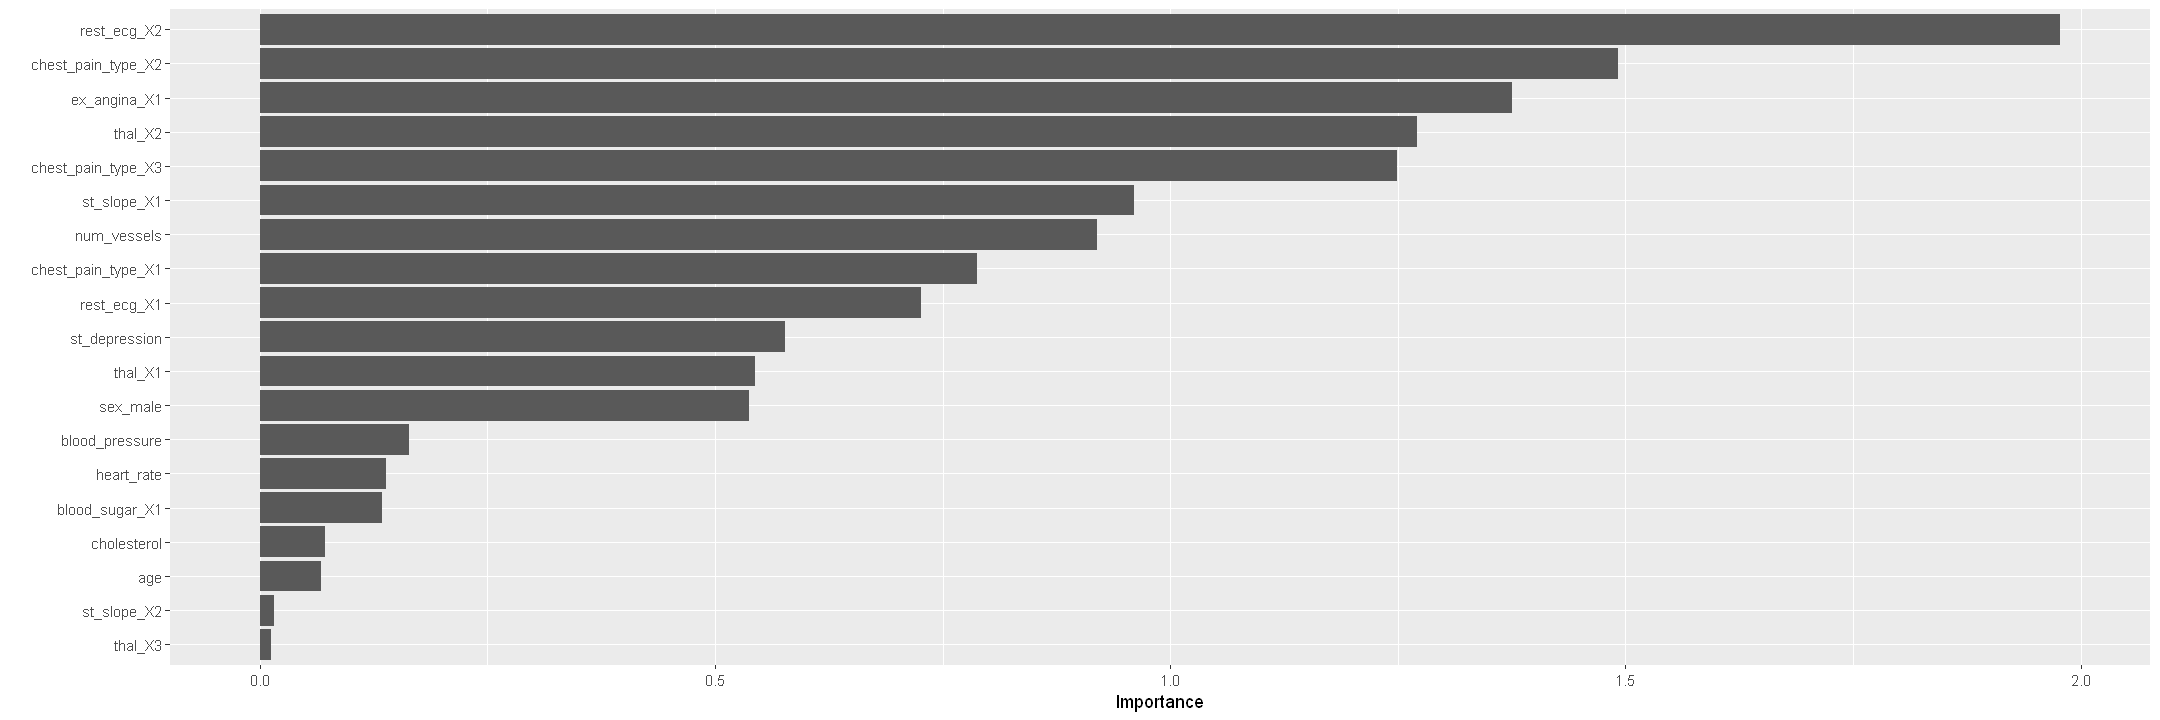

In [920]:
library(vip)
best_fit %>% 
  pluck(".workflow", 1) %>%   
  pull_workflow_fit() %>% 
  vip(num_features = 20)

Nakonec už nám zbývá jen vykreslit ROC křivku pro testovací data a spočítat příslušné metriky, které nás zajímají. Jak už bylo zmíněno dříve, důležitá je pro nás hlavně sensitivita, která kontroluje počet správně detekovaných pozitivních případů oproti celkovému počtu pozitivních případů. Pracujeme zde s myšlenkou, že je lepší mít falešně pozitivní test než falešně negativní test.

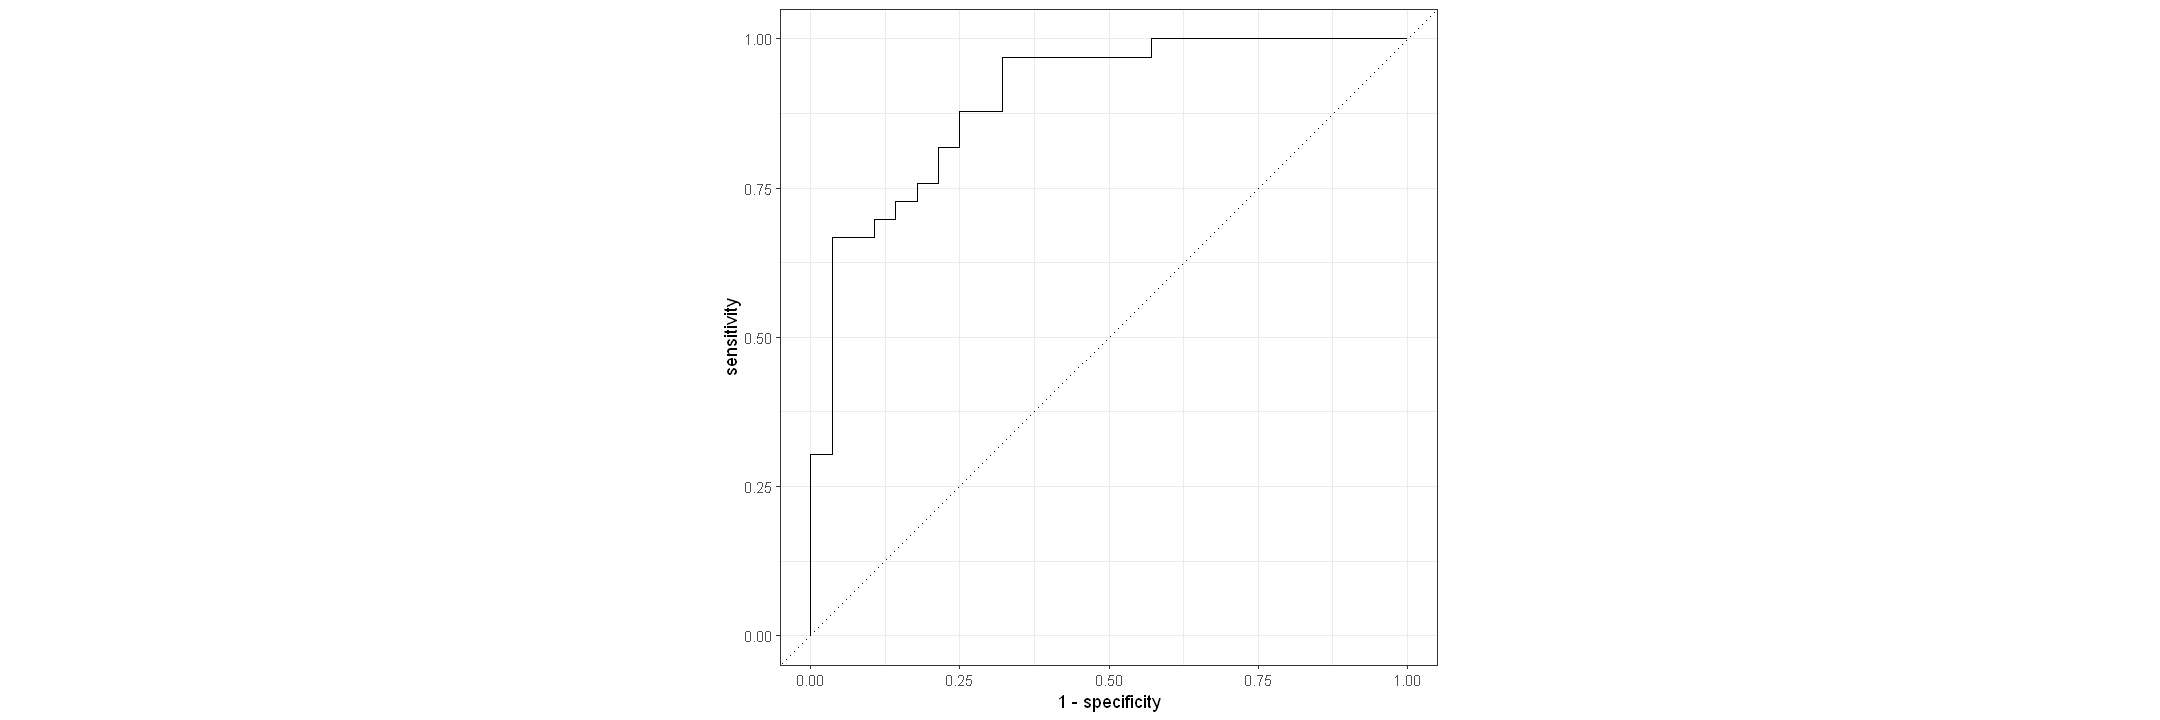

In [921]:
best_fit %>% 
  collect_predictions() %>% 
  roc_curve(disease, .pred_0) %>% 
  autoplot()

In [922]:
AUC <- best_fit %>% 
  collect_predictions() %>% 
  roc_auc(disease, .pred_0)

S <- best_fit %>% 
  collect_predictions() %>% 
  sens(disease, .pred_class)

ACC <- best_fit %>% 
  collect_predictions() %>% 
  accuracy(disease, .pred_class)

m_res <- as.data.frame(rbind(AUC, S, ACC))
m_res$.metric <- c("ROC-AUC", "Sensitivity", "Accuracy")
m_res

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
ROC-AUC,binary,0.8993506
Sensitivity,binary,0.8181818
Accuracy,binary,0.7868852


Z tabulky vidíme, že plocha pod ROC křivkou je poměrně vysoká. Navíc máme i relativně vysokou sensitivitu. Model by šel pravdědobně ještě vylepšit, nicméně podařilo se dosáhnout poměrně kvalitních výsledků.